# Projet 7 : Implémentez un modèle de scoring

# Partie 1 : Analyse exploratoire

Ce notebook d'analyse exploratoire est organisé de la manière suivante :

* [**1. Analyse pré-exploratoire**](#1.-Analyse-pré-exploratoire)
  * [**1.1 Importation des différents fichiers de données csv**](#1.1-Importation-des-différents-fichiers-de-données-csv)
  * [**1.2 Sélection du jeu de données**](#1.2-Sélection-du-jeu-de-données)
    * [**1.2.1 Création de nouvelles variables**](#1.2.1-Création-de-nouvelles-variables)
    * [**1.2.2 Création de nouvelles variables**](#1.2.2-Jointures-et-aggrégations-des-jeux-de-données)
  * [**1.3 Nettoyage du jeu de données final**](#1.3-Nettoyage-du-jeu-de-données-final)
    * [**1.3.1 Gestion des valeurs manquantes**](#1.3.1-Gestion-des-valeurs-manquantes)
    * [**1.3.2 Gestion des variables**](#1.3.2-Gestion-des-variables)
      * [**1.3.2.1 La conversion des variables catégorielles booléennes**](#1.3.2.1-La-conversion-des-variables-catégorielles-booléennes)
      * [**1.3.2.2 Les variables numériques et binaires**](#1.3.2.2-Les-variables-numériques-et-binaires)
      * [**1.3.2.3 Les variables binaires**](#1.3.2.3-Les-variables-binaires)
      * [**1.3.2.4 Les variables numériques**](#1.3.2.4-Les-variables-numériques)
      * [**1.3.2.5 Les variables catégorielles**](#1.3.2.5-Les-variables-catégorielles)
    * [**1.3.2 Gestion des variables**](#1.3.2-Gestion-des-variables)
    * [**1.3.3 Gestion des doublons**](#1.3.3-Gestion-des-doublons)
    * [**1.3.4 Gestion des outliers**](#1.3.4-Gestion-des-outliers)
* [**2. Analyse exploratoire**](#2.-Analyse-exploratoire)
  * [**2.1 Analyse des corrélations**](#2.1-Analyse-des-corrélations)
  * [**2.2 Exploration du jeu de données**](#2.2-Exploration-du-jeu-de-données)
    * [**2.2.1 Classification binaire sur des données déséquilibrées**](#2.2.1-Classification-binaire-sur-des-données-déséquilibrées)
    * [**2.2.2 Distributions des variables numériques**](#2.2.2-Distributions-des-variables-numériques)
* [**3. Exportat du jeu de données en format csv**](#3.-Export-du-jeu-de-données-en-format-csv)

# 1. Analyse pré-exploratoire

Nous commençons par importer les librairies nécessaires.

In [1]:
# Project 7: Implementing a scoring model
# Part 1: Analysis
# 1. Preprocessing
# Import libraries
import warnings
import csv
import seaborn as sns
%pylab inline
import pandas as pd


from matplotlib.collections import LineCollection

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1.1 Import des différents fichiers de données csv

Kernel Kaggle sélectionné pour la préparation des données nécessaires à l’élaboration du modèle de scoring :

https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features

In [2]:
# 1.1 Import of different csv data files
def load_dataset(file):
    """This function is used to load csv datasets."""
    with open(file, 'r') as csvfile:
        # Sniffing csv file to find separator
        dialect = csv.Sniffer().sniff(csvfile.readline())
    data = pd.read_csv(file,
                     sep=dialect.delimiter,
                     encoding_errors='ignore')
    return data


def display_dataset_info(data):
    """This function displays the dataset information."""
    # Dimensions of the dataset
    print("Dimensions of the dataset: {}".format(data.shape))

    # Information about the dataset
    print("\nInformation about the dataset: ")
    print(data.info())

    # Dataset completion rate
    data_completion = data.count() / len(data) * 100
    data_completion_rate = round(data_completion.mean(), 0)
    print("\nData completion rate: {}".format(data_completion_rate))

    # Missing data rate
    data_dna = data.isna().mean() * 100
    data_dna_rate = round(data_dna.mean(), 0)
    print("Missing data rate: {}".format(data_dna_rate))


def display_data_completion_rate(data, fig_size, annotate):
    """This function displays the dataset completion rate."""
    # Dataset completion rate
    data_completion = data.count() / len(data) * 100
    print(round(data_completion, 2))
    data_completion_rate = data_completion.astype(int)
    dataviz = data_completion_rate.sort_values(ascending=False)

    # Setup the figure
    ax = dataviz.plot(kind='bar', figsize=fig_size)
    if annotate is True:
        for value in ax.patches:
            ax.annotate(
                value.get_height(),
                (value.get_x() + value.get_width() / 2,
                 value.get_height()),
                ha='center',
                va='bottom')
    fig = ax.get_figure()
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        ha='right')
    ax.set_title('Data completion rate')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Percentage of data completion (%)')
    plt.show()

Chargement du jeu de données "bureau" :

Dimensions of the dataset: (1716428, 17)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None

Data completion rate: 86.0
Missing data 

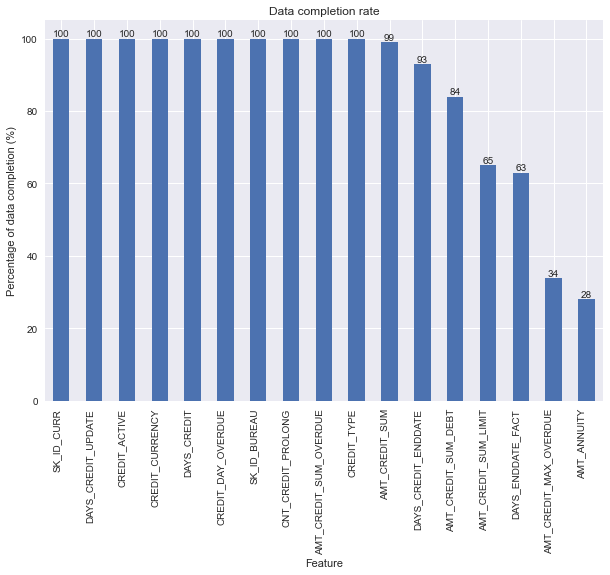

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.000,0.000,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.000,171342.000,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.500,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.000,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.50,0,2700000.000,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.00,0,180000.000,71017.380,108982.620,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.00,0,42103.800,42103.800,0.000,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.00,0,76878.450,0.000,0.000,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.00,0,103007.700,0.000,0.000,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.00,0,4500.000,0.000,0.000,0.0,Credit card,-690,NaN


In [3]:
# Loading the "bureau" dataset
file = 'bureau.csv'
bureau = load_dataset(file)

# Displaying the dataset information
display_dataset_info(bureau)

# Displaying the dataset completion rate
display_data_completion_rate(bureau, (10, 7), True)
bureau.head(50)

Chargement du jeu de données "bureau_balance" :

Dimensions of the dataset: (27299925, 3)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None

Data completion rate: 100.0
Missing data rate: 0.0
SK_ID_BUREAU      100.0
MONTHS_BALANCE    100.0
STATUS            100.0
dtype: float64


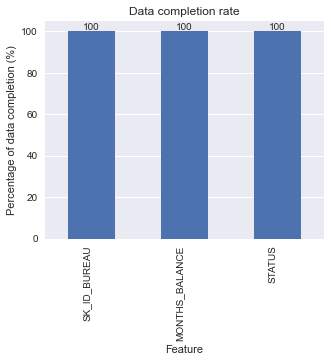

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [4]:
# Loading the "bureau_balance" dataset
file = 'bureau_balance.csv'
bureau_balance = load_dataset(file)

# Displaying the dataset information
display_dataset_info(bureau_balance)

# Displaying the dataset completion rate
display_data_completion_rate(bureau_balance, (5, 4), True)
bureau_balance.head(50)

Chargement du jeu de données "credit_card_balance" :

In [5]:
# Loading the "credit_card_balance" dataset
file = 'credit_card_balance.csv'
credit_card_balance = load_dataset(file)

# Displaying the dataset information
display_dataset_info(credit_card_balance)
credit_card_balance.head(50)

Dimensions of the dataset: (3840312, 23)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  f

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.000,0.0,0.000,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.0,0.000,0.0,0.000,4449.105,...,82773.315,82773.315,0.0,0,0.0,0.0,2.0,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.0,67500.000,0.0,0.000,14684.175,...,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.000,0.0,0.000,0.000,...,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.500,...,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.340,...,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0


SK_ID_PREV                    100.00
SK_ID_CURR                    100.00
MONTHS_BALANCE                100.00
AMT_BALANCE                   100.00
AMT_CREDIT_LIMIT_ACTUAL       100.00
AMT_DRAWINGS_ATM_CURRENT       80.48
AMT_DRAWINGS_CURRENT          100.00
AMT_DRAWINGS_OTHER_CURRENT     80.48
AMT_DRAWINGS_POS_CURRENT       80.48
AMT_INST_MIN_REGULARITY        92.05
AMT_PAYMENT_CURRENT            80.00
AMT_PAYMENT_TOTAL_CURRENT     100.00
AMT_RECEIVABLE_PRINCIPAL      100.00
AMT_RECIVABLE                 100.00
AMT_TOTAL_RECEIVABLE          100.00
CNT_DRAWINGS_ATM_CURRENT       80.48
CNT_DRAWINGS_CURRENT          100.00
CNT_DRAWINGS_OTHER_CURRENT     80.48
CNT_DRAWINGS_POS_CURRENT       80.48
CNT_INSTALMENT_MATURE_CUM      92.05
NAME_CONTRACT_STATUS          100.00
SK_DPD                        100.00
SK_DPD_DEF                    100.00
dtype: float64


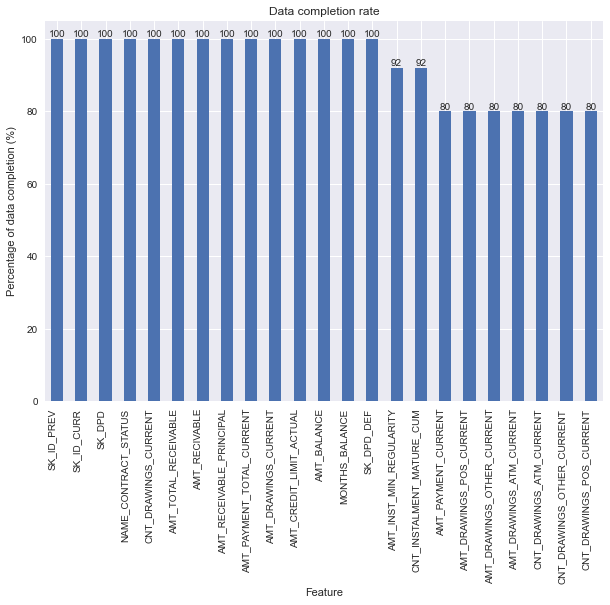

In [6]:
# Displaying the dataset completion rate
display_data_completion_rate(credit_card_balance, (10, 7), True)

Chargement du jeu de données "HomeCredit_columns_description" :

Dimensions of the dataset: (219, 5)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB
None

Data completion rate: 88.0
Missing data rate: 12.0
Unnamed: 0     100.00
Table          100.00
Row            100.00
Description    100.00
Special         39.27
dtype: float64


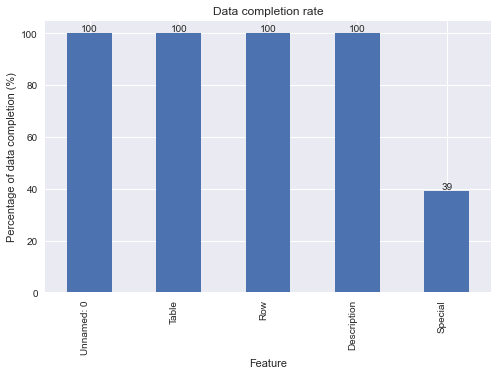

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [7]:
# Loading the "HomeCredit_columns_description" dataset
file = 'HomeCredit_columns_description.csv'
homecredit_description = load_dataset(file)

# Displaying the dataset information
display_dataset_info(homecredit_description)

# Displaying the dataset completion rate
display_data_completion_rate(homecredit_description, (8, 5), True)
homecredit_description.head(50)

Chargement du jeu de données "installments_payments" :

Dimensions of the dataset: (13605401, 8)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None

Data completion rate: 100.0
Missing data rate: 0.0
SK_ID_PREV                100.00
SK_ID_CURR                100.00
NUM_INSTALMENT_VERSION    100.00
NUM_INSTALMENT_NUMBER     100.00
DAYS_INSTALMENT           100.00
DAYS_ENTRY_PAYMENT         99.98
AMT_INSTALMENT            100.00
AMT_PAYMENT                99.98
dtype: float64


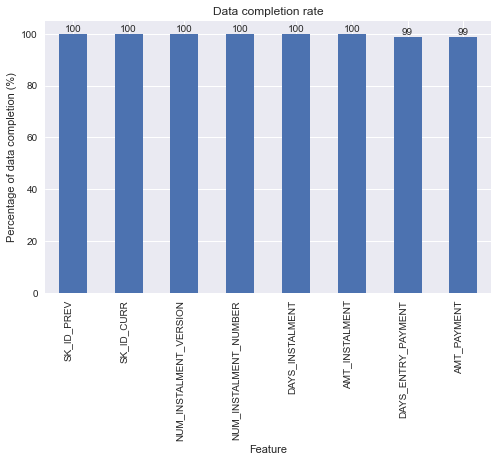

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


In [8]:
# Loading the "installments_payments" dataset
file = 'installments_payments.csv'
installments_payments = load_dataset(file)

# Displaying the dataset information
display_dataset_info(installments_payments)

# Displaying the dataset completion rate
display_data_completion_rate(installments_payments, (8, 5), True)
installments_payments.head(50)

Chargement du jeu de données "POS_CASH_balance" :

Dimensions of the dataset: (10001358, 8)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None

Data completion rate: 100.0
Missing data rate: 0.0
SK_ID_PREV               100.00
SK_ID_CURR               100.00
MONTHS_BALANCE           100.00
CNT_INSTALMENT            99.74
CNT_INSTALMENT_FUTURE     99.74
NAME_CONTRACT_STATUS     100.00
SK_DPD                   100.00
SK_DPD_DEF               100.00
dtype: float64


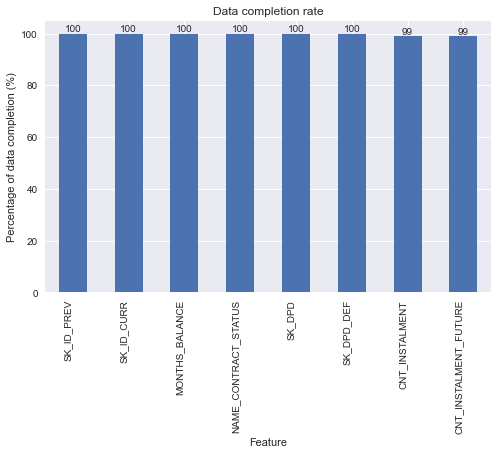

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [9]:
# Loading the "POS_CASH_balance" dataset
file = 'POS_CASH_balance.csv'
pos_cash_balance = load_dataset(file)

# Displaying the dataset information
display_dataset_info(pos_cash_balance)

# Displaying the dataset completion rate
display_data_completion_rate(pos_cash_balance, (8, 5), True)
pos_cash_balance.head(50)

Chargement du jeu de données "previous_application" :

In [10]:
# Loading the "previous_application" dataset
file = 'previous_application.csv'
previous_application = load_dataset(file)

# Displaying the dataset information
display_dataset_info(previous_application)
previous_application.head(50)

Dimensions of the dataset: (1670214, 37)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY      

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


SK_ID_PREV                     100.00
SK_ID_CURR                     100.00
NAME_CONTRACT_TYPE             100.00
AMT_ANNUITY                     77.71
AMT_APPLICATION                100.00
AMT_CREDIT                     100.00
AMT_DOWN_PAYMENT                46.36
AMT_GOODS_PRICE                 76.92
WEEKDAY_APPR_PROCESS_START     100.00
HOUR_APPR_PROCESS_START        100.00
FLAG_LAST_APPL_PER_CONTRACT    100.00
NFLAG_LAST_APPL_IN_DAY         100.00
RATE_DOWN_PAYMENT               46.36
RATE_INTEREST_PRIMARY            0.36
RATE_INTEREST_PRIVILEGED         0.36
NAME_CASH_LOAN_PURPOSE         100.00
NAME_CONTRACT_STATUS           100.00
DAYS_DECISION                  100.00
NAME_PAYMENT_TYPE              100.00
CODE_REJECT_REASON             100.00
NAME_TYPE_SUITE                 50.88
NAME_CLIENT_TYPE               100.00
NAME_GOODS_CATEGORY            100.00
NAME_PORTFOLIO                 100.00
NAME_PRODUCT_TYPE              100.00
CHANNEL_TYPE                   100.00
SELLERPLACE_

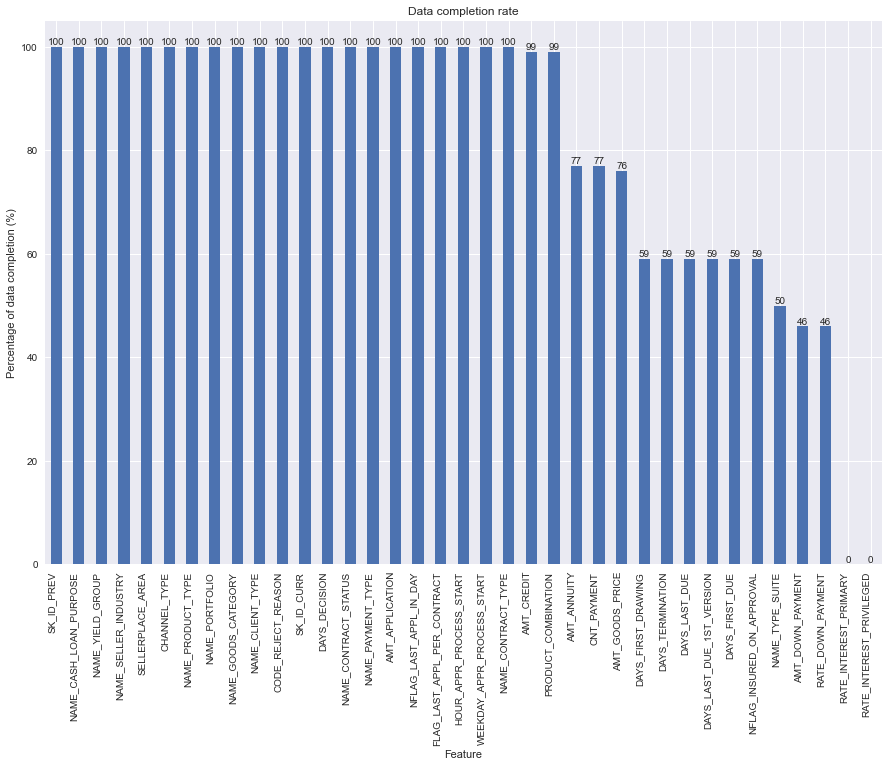

In [11]:
# Displaying the dataset completion rate
display_data_completion_rate(previous_application, (15, 10), True)

Chargement du jeu de données "sample_submission" :

Dimensions of the dataset: (48744, 2)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB
None

Data completion rate: 100.0
Missing data rate: 0.0
SK_ID_CURR    100.0
TARGET        100.0
dtype: float64


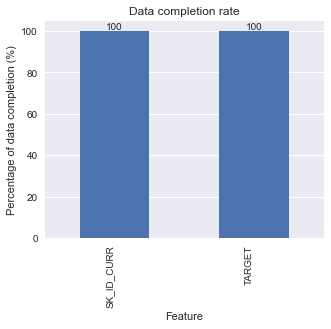

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
5,100042,0.5
6,100057,0.5
7,100065,0.5
8,100066,0.5
9,100067,0.5


In [12]:
# Loading the "sample_submission" dataset
file = 'sample_submission.csv'
sample_submission = load_dataset(file)

# Displaying the dataset information
display_dataset_info(sample_submission)

# Displaying the dataset completion rate
display_data_completion_rate(sample_submission, (5, 4), True)
sample_submission.head(50)

Chargement du jeu de données "application_train" :

In [13]:
# Loading the "application_train" dataset
file = 'application_train.csv'
application_train = load_dataset(file)

# Displaying the dataset information
display_dataset_info(application_train)
application_train.head(50)

Dimensions of the dataset: (307511, 122)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Data completion rate: 76.0
Missing data rate: 24.0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Displaying the dataset information
col = len(application_train.columns)
display_dataset_info(application_train.iloc[:, 0:int(col/2)])

Dimensions of the dataset: (307511, 61)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               3

SK_ID_CURR                      100.00
TARGET                          100.00
NAME_CONTRACT_TYPE              100.00
CODE_GENDER                     100.00
FLAG_OWN_CAR                    100.00
                                 ...  
NONLIVINGAPARTMENTS_AVG          30.57
NONLIVINGAREA_AVG                44.82
APARTMENTS_MODE                  49.25
BASEMENTAREA_MODE                41.48
YEARS_BEGINEXPLUATATION_MODE     51.22
Length: 61, dtype: float64


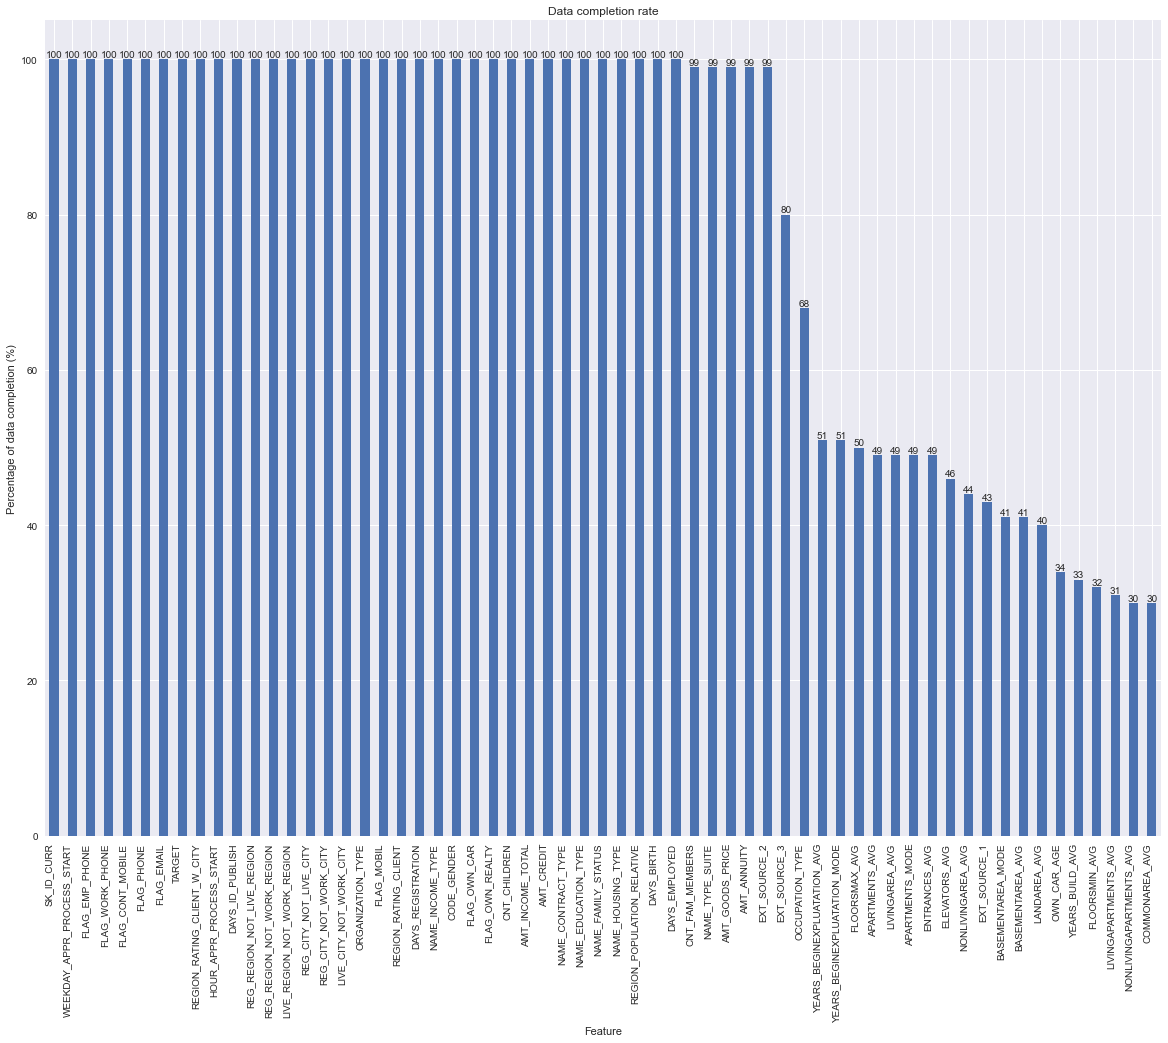

In [15]:
# Displaying the dataset completion rate
display_data_completion_rate(application_train.iloc[:, 0:int(col/2)],
                             (20, 15),
                             True)

In [16]:
# Displaying the dataset information
display_dataset_info(application_train.iloc[:, int(col/2)+1:col])

Dimensions of the dataset: (307511, 60)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   COMMONAREA_MODE               92646 non-null   float64
 1   ELEVATORS_MODE                143620 non-null  float64
 2   ENTRANCES_MODE                152683 non-null  float64
 3   FLOORSMAX_MODE                154491 non-null  float64
 4   FLOORSMIN_MODE                98869 non-null   float64
 5   LANDAREA_MODE                 124921 non-null  float64
 6   LIVINGAPARTMENTS_MODE         97312 non-null   float64
 7   LIVINGAREA_MODE               153161 non-null  float64
 8   NONLIVINGAPARTMENTS_MODE      93997 non-null   float64
 9   NONLIVINGAREA_MODE            137829 non-null  float64
 10  APARTMENTS_MEDI               151450 non-null  float64
 11  BASEMENTAREA_MEDI             1

COMMONAREA_MODE                  30.13
ELEVATORS_MODE                   46.70
ENTRANCES_MODE                   49.65
FLOORSMAX_MODE                   50.24
FLOORSMIN_MODE                   32.15
LANDAREA_MODE                    40.62
LIVINGAPARTMENTS_MODE            31.65
LIVINGAREA_MODE                  49.81
NONLIVINGAPARTMENTS_MODE         30.57
NONLIVINGAREA_MODE               44.82
APARTMENTS_MEDI                  49.25
BASEMENTAREA_MEDI                41.48
YEARS_BEGINEXPLUATATION_MEDI     51.22
YEARS_BUILD_MEDI                 33.50
COMMONAREA_MEDI                  30.13
ELEVATORS_MEDI                   46.70
ENTRANCES_MEDI                   49.65
FLOORSMAX_MEDI                   50.24
FLOORSMIN_MEDI                   32.15
LANDAREA_MEDI                    40.62
LIVINGAPARTMENTS_MEDI            31.65
LIVINGAREA_MEDI                  49.81
NONLIVINGAPARTMENTS_MEDI         30.57
NONLIVINGAREA_MEDI               44.82
FONDKAPREMONT_MODE               31.61
HOUSETYPE_MODE           

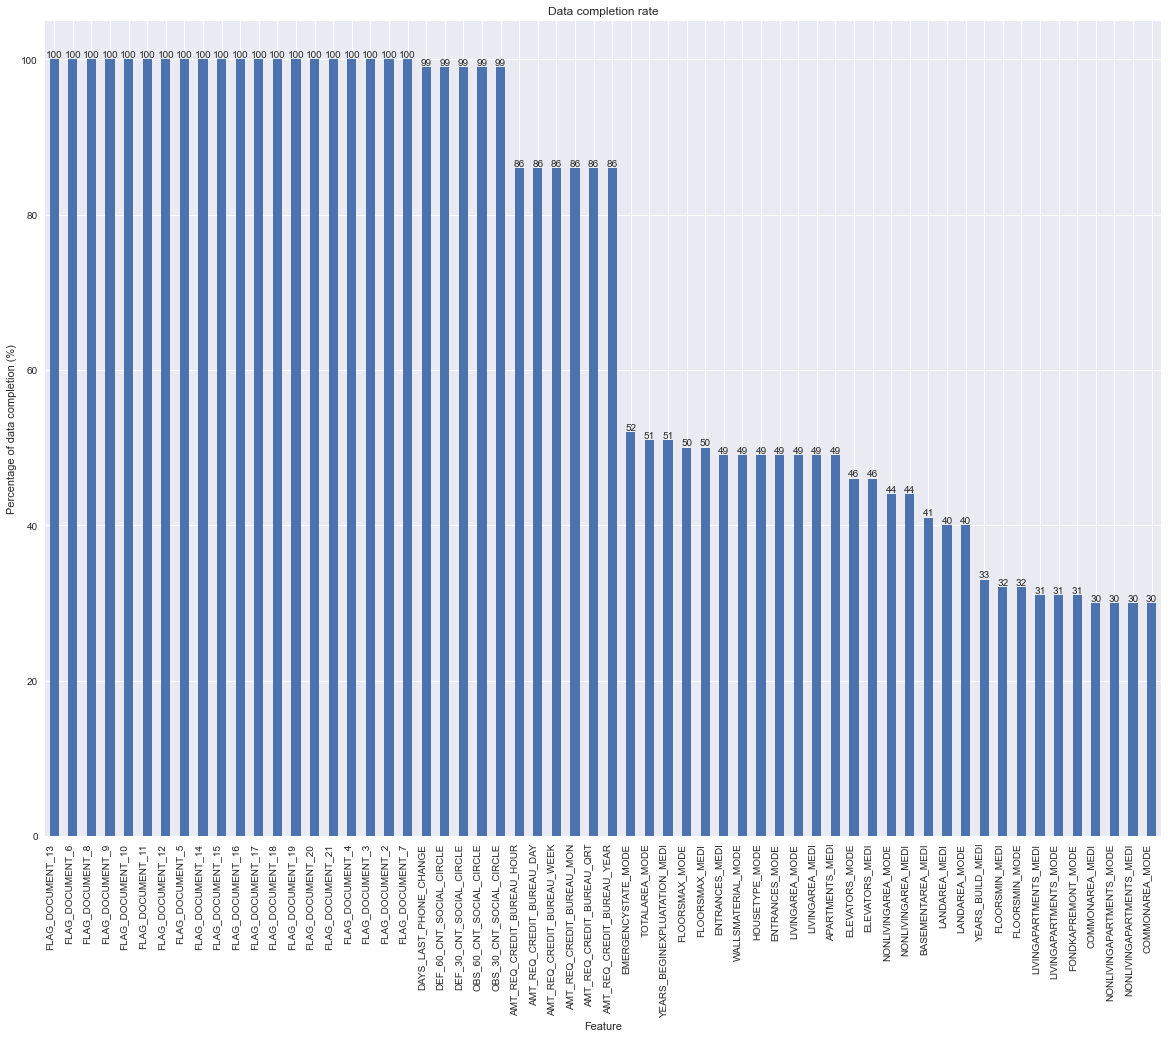

In [17]:
# Displaying the dataset completion rate
display_data_completion_rate(application_train.iloc[:, int(col/2)+1:col],
                             (20, 15),
                             True)

Chargement du jeu de données "application_test" :

In [18]:
# Loading the "application_train" dataset
file = 'application_test.csv'
application_test = load_dataset(file)

# Displaying the dataset information
display_dataset_info(application_test)
application_test.head(50)

Dimensions of the dataset: (48744, 121)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None

Data completion rate: 76.0
Missing data rate: 24.0


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [19]:
# Displaying the dataset information
col = len(application_test.columns)
display_dataset_info(application_test.iloc[:, 0:int(col/2)])

Dimensions of the dataset: (48744, 60)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    48744 non-null  int64  
 1   NAME_CONTRACT_TYPE            48744 non-null  object 
 2   CODE_GENDER                   48744 non-null  object 
 3   FLAG_OWN_CAR                  48744 non-null  object 
 4   FLAG_OWN_REALTY               48744 non-null  object 
 5   CNT_CHILDREN                  48744 non-null  int64  
 6   AMT_INCOME_TOTAL              48744 non-null  float64
 7   AMT_CREDIT                    48744 non-null  float64
 8   AMT_ANNUITY                   48720 non-null  float64
 9   AMT_GOODS_PRICE               48744 non-null  float64
 10  NAME_TYPE_SUITE               47833 non-null  object 
 11  NAME_INCOME_TYPE              48744 non-null  o

SK_ID_CURR                      100.00
NAME_CONTRACT_TYPE              100.00
CODE_GENDER                     100.00
FLAG_OWN_CAR                    100.00
FLAG_OWN_REALTY                 100.00
CNT_CHILDREN                    100.00
AMT_INCOME_TOTAL                100.00
AMT_CREDIT                      100.00
AMT_ANNUITY                      99.95
AMT_GOODS_PRICE                 100.00
NAME_TYPE_SUITE                  98.13
NAME_INCOME_TYPE                100.00
NAME_EDUCATION_TYPE             100.00
NAME_FAMILY_STATUS              100.00
NAME_HOUSING_TYPE               100.00
REGION_POPULATION_RELATIVE      100.00
DAYS_BIRTH                      100.00
DAYS_EMPLOYED                   100.00
DAYS_REGISTRATION               100.00
DAYS_ID_PUBLISH                 100.00
OWN_CAR_AGE                      33.71
FLAG_MOBIL                      100.00
FLAG_EMP_PHONE                  100.00
FLAG_WORK_PHONE                 100.00
FLAG_CONT_MOBILE                100.00
FLAG_PHONE               

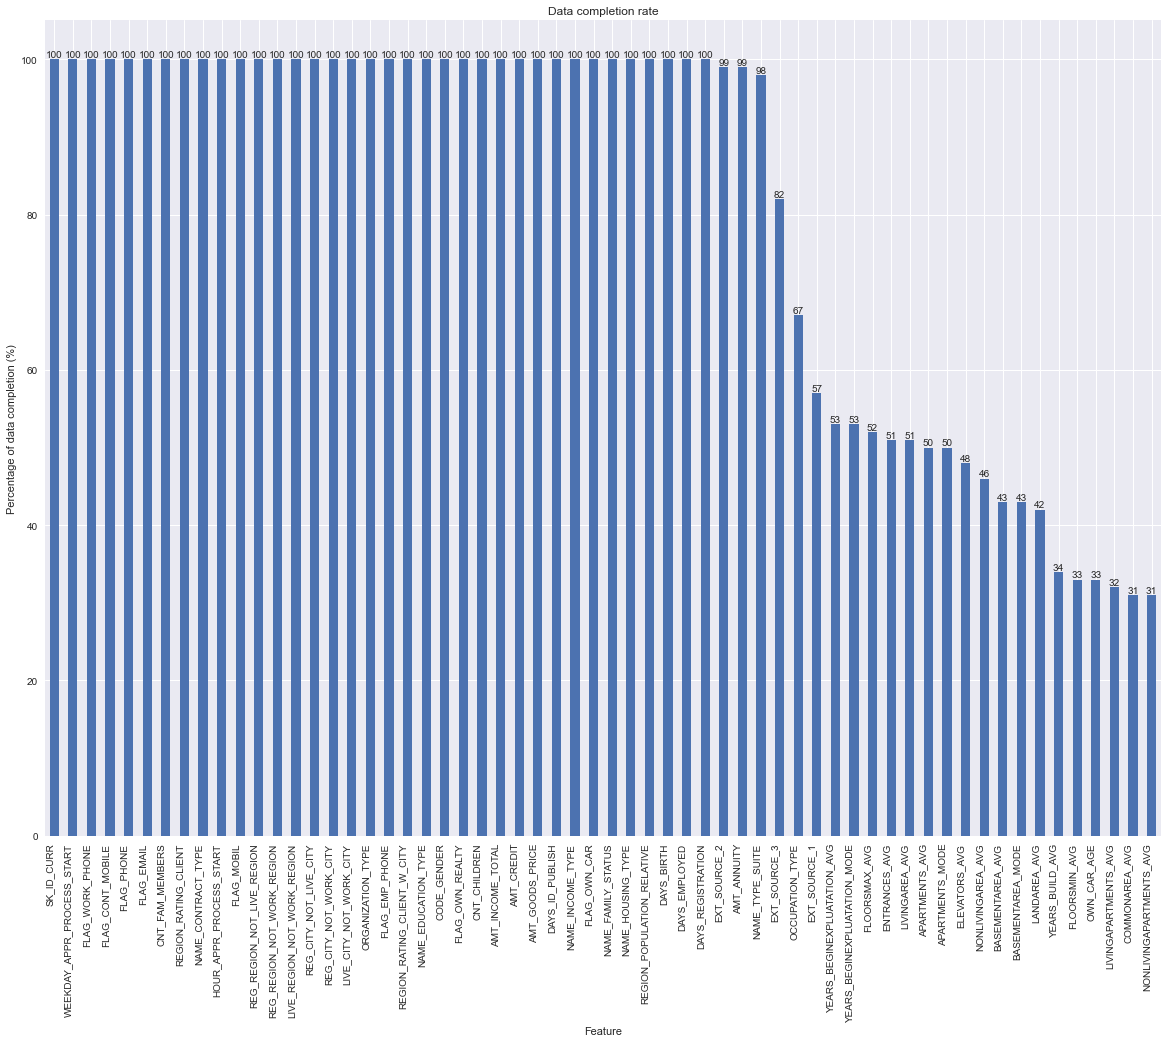

In [20]:
# Displaying the dataset completion rate
display_data_completion_rate(application_test.iloc[:, 0:int(col/2)],
                             (20, 15),
                             True)

In [21]:
# Displaying the dataset information
display_dataset_info(application_test.iloc[:, int(col/2)+1:col])

Dimensions of the dataset: (48744, 60)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   COMMONAREA_MODE               15249 non-null  float64
 1   ELEVATORS_MODE                23555 non-null  float64
 2   ENTRANCES_MODE                25165 non-null  float64
 3   FLOORSMAX_MODE                25423 non-null  float64
 4   FLOORSMIN_MODE                16278 non-null  float64
 5   LANDAREA_MODE                 20490 non-null  float64
 6   LIVINGAPARTMENTS_MODE         15964 non-null  float64
 7   LIVINGAREA_MODE               25192 non-null  float64
 8   NONLIVINGAPARTMENTS_MODE      15397 non-null  float64
 9   NONLIVINGAREA_MODE            22660 non-null  float64
 10  APARTMENTS_MEDI               24857 non-null  float64
 11  BASEMENTAREA_MEDI             21103 non-null  f

COMMONAREA_MODE                  31.28
ELEVATORS_MODE                   48.32
ENTRANCES_MODE                   51.63
FLOORSMAX_MODE                   52.16
FLOORSMIN_MODE                   33.39
LANDAREA_MODE                    42.04
LIVINGAPARTMENTS_MODE            32.75
LIVINGAREA_MODE                  51.68
NONLIVINGAPARTMENTS_MODE         31.59
NONLIVINGAREA_MODE               46.49
APARTMENTS_MEDI                  50.99
BASEMENTAREA_MEDI                43.29
YEARS_BEGINEXPLUATATION_MEDI     53.11
YEARS_BUILD_MEDI                 34.72
COMMONAREA_MEDI                  31.28
ELEVATORS_MEDI                   48.32
ENTRANCES_MEDI                   51.63
FLOORSMAX_MEDI                   52.16
FLOORSMIN_MEDI                   33.39
LANDAREA_MEDI                    42.04
LIVINGAPARTMENTS_MEDI            32.75
LIVINGAREA_MEDI                  51.68
NONLIVINGAPARTMENTS_MEDI         31.59
NONLIVINGAREA_MEDI               46.49
FONDKAPREMONT_MODE               32.72
HOUSETYPE_MODE           

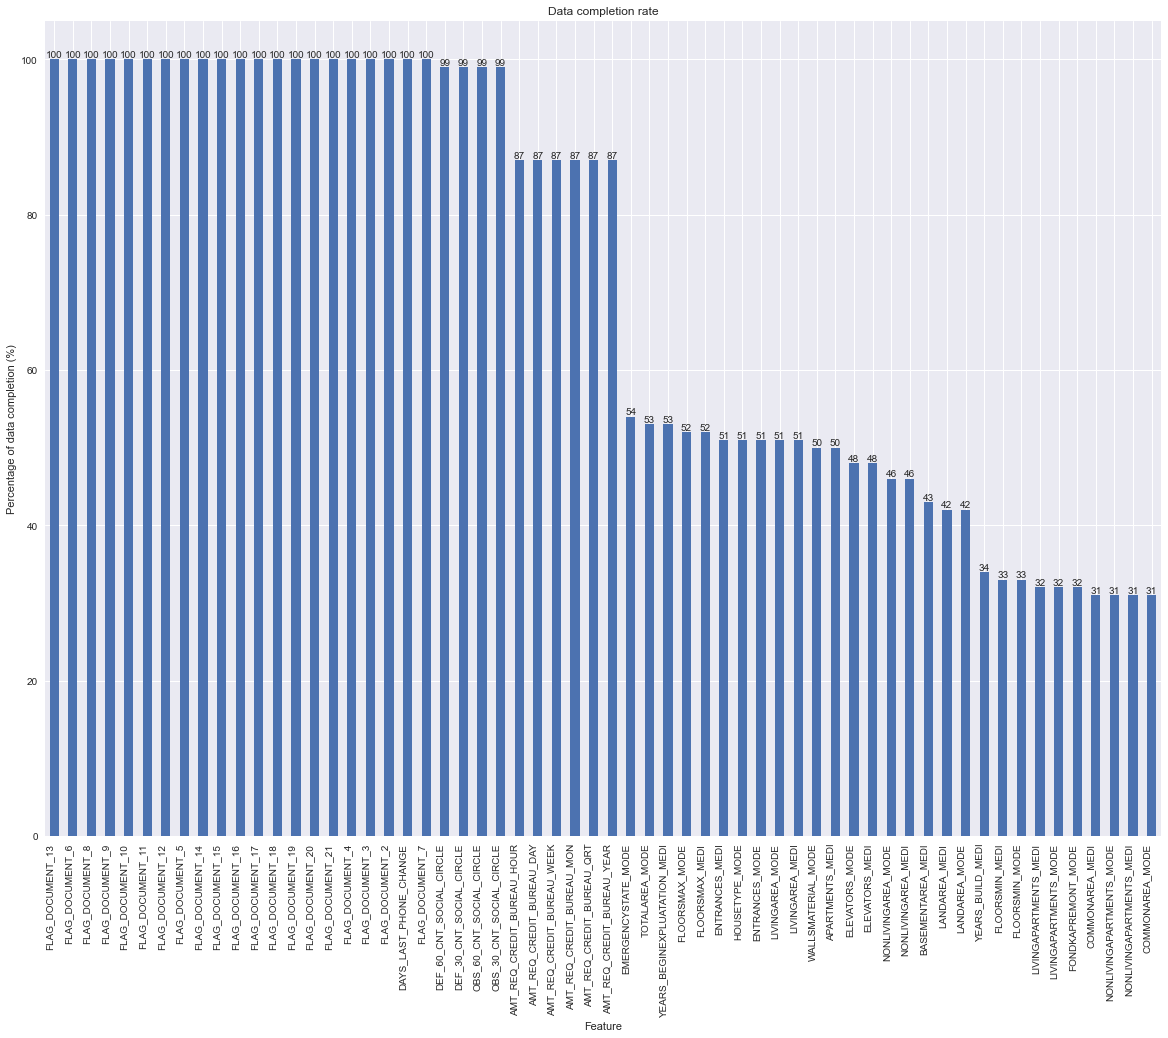

In [22]:
# Displaying the dataset completion rate
display_data_completion_rate(application_test.iloc[:, int(col/2)+1:col],
                             (20, 15),
                             True)

## 1.2 Sélection du jeu de données

Nous observons que les valeurs de la variable cible du jeu de données "application_test" ne sont pas des valeurs binaires contrairement au jeu de données "application_train". Nous allons donc travailler avec le jeu de données "application_train".

In [23]:
# 1.2 Selection of relevant features
# Main table
data = application_train
unrelevant_features = [
    'WEEKDAY_APPR_PROCESS_START', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
    'NAME_TYPE_SUITE']
data = data.drop(unrelevant_features, axis=1)
data = data.sort_values(['SK_ID_CURR'], ascending=True)
print(data.shape)
data.head(50)

(307511, 97)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0.0,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2.1 Création de nouvelles variables

In [24]:
# 1.2.1 Create additional features
data['INCOME_BY_PERSON'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
data['ANNUITY_INCOME_RATE'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['DAYS_EMPLOYED_RATE'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['INCOME_CREDIT_RATE'] = data['AMT_INCOME_TOTAL'] / data['AMT_CREDIT']
data['INCOME_PART_RATE'] = data['INCOME_BY_PERSON'] / data['AMT_INCOME_TOTAL']
data['PAYMENT_RATE'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
print(data.shape)
data.head(50)

(307511, 103)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_BY_PERSON,ANNUITY_INCOME_RATE,DAYS_EMPLOYED_RATE,INCOME_CREDIT_RATE,INCOME_PART_RATE,PAYMENT_RATE
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0.0,0.0,0.0,1.0,202500.0000,0.121978,0.067329,0.498036,1.000000,0.060749
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,135000.0000,0.132217,0.070862,0.208736,0.500000,0.027598
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0.0,0.0,0.0,0.0,67500.0000,0.100000,0.011814,0.500000,1.000000,0.050000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,NaN,NaN,NaN,NaN,67500.0000,0.219900,0.159905,0.431748,0.500000,0.094941
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0.0,0.0,0.0,0.0,121500.0000,0.179963,0.152418,0.236842,1.000000,0.042623
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0.0,0.0,1.0,1.0,49500.0000,0.277955,0.093737,0.201837,0.500000,0.056101
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0.0,1.0,1.0,2.0,57000.0000,0.241526,0.227174,0.109564,0.333333,0.026463
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,180000.0000,0.116875,0.023820,0.235294,0.500000,0.027500
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0.0,0.0,0.0,1.0,56250.0000,0.300680,-18.172198,0.110336,0.500000,0.033176
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,NaN,NaN,NaN,NaN,135000.0000,0.150000,0.139540,0.333333,1.000000,0.050000


### 1.2.2 Jointures et aggrégations des jeux de données

In [25]:
# 1.2.2 Merge and aggregations of datasets
# Other financial institutions balance
b_balance = bureau_balance.groupby(
    'SK_ID_BUREAU', as_index=False).agg(
    MONTHS_BALANCE=('MONTHS_BALANCE','mean'))
print(b_balance.shape)

bureau_df = pd.merge(
    bureau,
    b_balance,
    on='SK_ID_BUREAU',
    how='outer')
bureau_df.drop('SK_ID_BUREAU', axis=1, inplace=True)

bureau_df = bureau_df.groupby(
    'SK_ID_CURR',
    as_index=False).mean().add_prefix('BUR_')
bureau_df = bureau_df.rename(
    columns={'BUR_SK_ID_CURR': 'SK_ID_CURR'})
bureau_df['SK_ID_CURR'] = bureau_df['SK_ID_CURR'].astype('int64')

print(bureau_df.shape)
bureau_df.head(50)

(817395, 2)
(305811, 14)


,SK_ID_CURR,BUR_DAYS_CREDIT,BUR_CREDIT_DAY_OVERDUE,BUR_DAYS_CREDIT_ENDDATE,BUR_DAYS_ENDDATE_FACT,BUR_AMT_CREDIT_MAX_OVERDUE,BUR_CNT_CREDIT_PROLONG,BUR_AMT_CREDIT_SUM,BUR_AMT_CREDIT_SUM_DEBT,BUR_AMT_CREDIT_SUM_LIMIT,BUR_AMT_CREDIT_SUM_OVERDUE,BUR_DAYS_CREDIT_UPDATE,BUR_AMT_ANNUITY,BUR_MONTHS_BALANCE
0,100001,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,2.076236e+05,8.524093e+04,0.000000,0.0,-93.142857,3545.357143,-11.785714
1,100002,-874.000000,0.0,-349.000000,-697.500000,1681.029000,0.0,1.081319e+05,4.915620e+04,7997.141250,0.0,-499.875000,0.000000,-21.875000
2,100003,-1400.750000,0.0,-544.500000,-1097.333333,0.000000,0.0,2.543501e+05,0.000000e+00,202500.000000,0.0,-816.000000,NaN,NaN
3,100004,-867.000000,0.0,-488.500000,-532.500000,0.000000,0.0,9.451890e+04,0.000000e+00,0.000000,0.0,-532.000000,NaN,NaN
4,100005,-190.666667,0.0,439.333333,-123.000000,0.000000,0.0,2.190420e+05,1.894695e+05,0.000000,0.0,-54.333333,1420.500000,-3.000000
5,100007,-1149.000000,0.0,-783.000000,-783.000000,0.000000,0.0,1.462500e+05,0.000000e+00,0.000000,0.0,-783.000000,NaN,NaN
6,100008,-757.333333,0.0,-391.333333,-909.000000,0.000000,0.0,1.561485e+05,8.001900e+04,0.000000,0.0,-611.000000,NaN,NaN
7,100009,-1271.500000,0.0,-794.937500,-1108.500000,0.000000,0.0,2.667118e+05,7.695354e+04,0.000000,0.0,-851.611111,NaN,NaN
8,100010,-1939.500000,0.0,-119.500000,-1138.000000,NaN,0.0,4.950000e+05,1.740038e+05,0.000000,0.0,-578.000000,NaN,-46.000000
9,100011,-1773.000000,0.0,-1293.250000,-1463.250000,5073.615000,0.0,1.088071e+05,0.000000e+00,0.000000,0.0,-1454.750000,NaN,NaN


In [26]:
# Credit card balance
credit_card_df = credit_card_balance.groupby(
    'SK_ID_CURR',
    as_index=False).mean().add_prefix('CARD_')
credit_card_df = credit_card_df.rename(
    columns={'CARD_SK_ID_CURR': 'SK_ID_CURR'})
credit_card_df.drop('CARD_SK_ID_PREV', axis=1, inplace=True)
print(credit_card_df.shape)
credit_card_df.head(50)

(103558, 21)


,SK_ID_CURR,CARD_MONTHS_BALANCE,CARD_AMT_BALANCE,CARD_AMT_CREDIT_LIMIT_ACTUAL,CARD_AMT_DRAWINGS_ATM_CURRENT,CARD_AMT_DRAWINGS_CURRENT,CARD_AMT_DRAWINGS_OTHER_CURRENT,CARD_AMT_DRAWINGS_POS_CURRENT,CARD_AMT_INST_MIN_REGULARITY,CARD_AMT_PAYMENT_CURRENT,...,CARD_AMT_RECEIVABLE_PRINCIPAL,CARD_AMT_RECIVABLE,CARD_AMT_TOTAL_RECEIVABLE,CARD_CNT_DRAWINGS_ATM_CURRENT,CARD_CNT_DRAWINGS_CURRENT,CARD_CNT_DRAWINGS_OTHER_CURRENT,CARD_CNT_DRAWINGS_POS_CURRENT,CARD_CNT_INSTALMENT_MATURE_CUM,CARD_SK_DPD,CARD_SK_DPD_DEF
0,100006,-3.5,0.000000,270000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
1,100011,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.000000,0.000000,3956.221849,4843.064189,...,52402.088919,54433.179122,54433.179122,0.054054,0.054054,0.000000,0.000000,25.767123,0.000000,0.000000
2,100013,-48.5,18159.919219,131718.750000,6350.000000,5953.125000,0.000000,0.000000,1454.539551,7168.346250,...,17255.559844,18101.079844,18101.079844,0.255556,0.239583,0.000000,0.000000,18.719101,0.010417,0.010417
3,100021,-10.0,0.000000,675000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
4,100023,-7.5,0.000000,135000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
5,100028,-25.0,8085.058163,225000.000000,613.636364,6156.400408,0.000000,6242.355000,6133.363929,6598.243256,...,7680.352041,7968.609184,7968.609184,0.045455,2.387755,0.000000,2.613636,19.547619,0.000000,0.000000
6,100036,-7.5,0.000000,78750.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
7,100042,-42.5,33356.183036,78750.000000,3160.714286,5923.886786,2475.375000,287.797500,2064.370663,7452.703929,...,31892.668393,33298.140000,33298.140000,0.226190,0.380952,0.059524,0.095238,30.072289,0.023810,0.000000
8,100043,-17.0,208572.600000,287045.454545,2045.454545,14904.972273,0.000000,12859.517727,11279.115000,21625.160625,...,203647.547727,208397.449091,208397.449091,0.060606,0.363636,0.000000,0.303030,13.870968,0.000000,0.000000
9,100047,-21.5,0.000000,326250.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000


In [27]:
# Payments history
payments_history_df = installments_payments.groupby(
    'SK_ID_CURR',
    as_index=False).mean().add_prefix('PAY_HIST_')
payments_history_df = payments_history_df.rename(
    columns={'PAY_HIST_SK_ID_CURR': 'SK_ID_CURR'})
payments_history_df.drop('PAY_HIST_SK_ID_PREV', axis=1, inplace=True)
print(payments_history_df.shape)
payments_history_df.head(50)

(339587, 7)


,SK_ID_CURR,PAY_HIST_NUM_INSTALMENT_VERSION,PAY_HIST_NUM_INSTALMENT_NUMBER,PAY_HIST_DAYS_INSTALMENT,PAY_HIST_DAYS_ENTRY_PAYMENT,PAY_HIST_AMT_INSTALMENT,PAY_HIST_AMT_PAYMENT
0,100001,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143
1,100002,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
2,100003,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
3,100004,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
4,100005,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000
5,100006,1.125000,4.437500,-252.250000,-271.625000,62947.088438,62947.088438
6,100007,1.166667,7.045455,-1028.606061,-1032.242424,12666.444545,12214.060227
7,100008,1.028571,5.057143,-1263.914286,-1237.800000,27702.964286,27360.502714
8,100009,1.000000,4.549020,-855.823529,-864.411765,9568.531765,9568.531765
9,100010,1.000000,5.500000,-904.000000,-915.900000,27449.208000,27449.208000


In [28]:
# Previous point of sales balance
pos_balance_df = pos_cash_balance.groupby(
    'SK_ID_CURR',
    as_index=False).mean().add_prefix('POS_')
pos_balance_df = pos_balance_df.rename(
    columns={'POS_SK_ID_CURR': 'SK_ID_CURR'})
pos_balance_df.drop('POS_SK_ID_PREV', axis=1, inplace=True)
print(pos_balance_df.shape)
pos_balance_df.head(50)

(337252, 6)


,SK_ID_CURR,POS_MONTHS_BALANCE,POS_CNT_INSTALMENT,POS_CNT_INSTALMENT_FUTURE,POS_SK_DPD,POS_SK_DPD_DEF
0,100001,-72.555556,4.000000,1.444444,0.777778,0.777778
1,100002,-10.000000,24.000000,15.000000,0.000000,0.000000
2,100003,-43.785714,10.107143,5.785714,0.000000,0.000000
3,100004,-25.500000,3.750000,2.250000,0.000000,0.000000
4,100005,-20.000000,11.700000,7.200000,0.000000,0.000000
5,100006,-9.619048,12.000000,8.650000,0.000000,0.000000
6,100007,-33.636364,15.333333,8.969697,0.000000,0.000000
7,100008,-43.662651,11.518072,4.108434,339.060241,0.000000
8,100009,-33.062500,7.875000,3.781250,0.000000,0.000000
9,100010,-30.000000,10.000000,5.000000,0.000000,0.000000


In [29]:
# Previous application number
prev_app_df = previous_application.groupby(
    'SK_ID_CURR', as_index=False).agg(
    PREV_APPLICATION_NUMBER=('SK_ID_PREV', 'count'),
    PREV_AMT_ANNUITY=('AMT_ANNUITY', 'mean'),
    PREV_AMT_DOWN_PAYMENT=('AMT_DOWN_PAYMENT', 'mean'),
    PREV_AMT_CREDIT=('AMT_CREDIT','mean'),
    PREV_AMT_GOODS_PRICE=('AMT_GOODS_PRICE', 'mean'),
    PREV_RATE_DOWN_PAYMENT=('RATE_DOWN_PAYMENT', 'mean'),
    PREV_CNT_PAYMENT=('CNT_PAYMENT', 'mean'))
print(prev_app_df.shape)
prev_app_df.head(50)

(338857, 8)


,SK_ID_CURR,PREV_APPLICATION_NUMBER,PREV_AMT_ANNUITY,PREV_AMT_DOWN_PAYMENT,PREV_AMT_CREDIT,PREV_AMT_GOODS_PRICE,PREV_RATE_DOWN_PAYMENT,PREV_CNT_PAYMENT
0,100001,1,3951.000000,2520.000000,23787.000000,2.483550e+04,0.104326,8.000000
1,100002,1,9251.775000,0.000000,179055.000000,1.790550e+05,0.000000,24.000000
2,100003,3,56553.990000,3442.500000,484191.000000,4.354365e+05,0.050030,10.000000
3,100004,1,5357.250000,4860.000000,20106.000000,2.428200e+04,0.212008,4.000000
4,100005,2,4813.200000,4464.000000,20076.750000,4.461750e+04,0.108964,12.000000
5,100006,9,23651.175000,34840.170000,291695.500000,4.083049e+05,0.163412,23.000000
6,100007,6,12278.805000,3390.750000,166638.750000,1.505302e+05,0.159516,20.666667
7,100008,5,15839.696250,5548.500000,162767.700000,1.946272e+05,0.073051,14.000000
8,100009,7,10051.412143,9203.142857,70137.642857,7.674171e+04,0.126602,8.000000
9,100010,1,27463.410000,0.000000,260811.000000,2.472120e+05,0.000000,10.000000


In [30]:
# Merging datasets
# Adding other financial institutions balance
data = pd.merge(
    data,
    bureau_df,
    on='SK_ID_CURR',
    how='outer')

# Adding credit card balance
data = pd.merge(
    data,
    credit_card_df,
    on='SK_ID_CURR',
    how='outer')

# Adding payments history
data = pd.merge(
    data,
    payments_history_df,
    on='SK_ID_CURR',
    how='outer')

# Adding previous point of sales balance
data = pd.merge(
    data,
    pos_balance_df,
    on='SK_ID_CURR',
    how='outer')

# Adding previous application number
data = pd.merge(
    data,
    prev_app_df,
    on='SK_ID_CURR',
    how='outer')

data = data.drop_duplicates(subset=['SK_ID_CURR'])
print(data.shape)
data.head(50)

(356095, 154)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,POS_CNT_INSTALMENT_FUTURE,POS_SK_DPD,POS_SK_DPD_DEF,PREV_APPLICATION_NUMBER,PREV_AMT_ANNUITY,PREV_AMT_DOWN_PAYMENT,PREV_AMT_CREDIT,PREV_AMT_GOODS_PRICE,PREV_RATE_DOWN_PAYMENT,PREV_CNT_PAYMENT
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.000,406597.5,24700.5,...,15.000000,0.000000,0.000000,1.0,9251.775000,0.000000,179055.000000,1.790550e+05,0.000000,24.000000
1,100003,0.0,Cash loans,F,N,N,0.0,270000.000,1293502.5,35698.5,...,5.785714,0.000000,0.000000,3.0,56553.990000,3442.500000,484191.000000,4.354365e+05,0.050030,10.000000
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.000,135000.0,6750.0,...,2.250000,0.000000,0.000000,1.0,5357.250000,4860.000000,20106.000000,2.428200e+04,0.212008,4.000000
3,100006,0.0,Cash loans,F,N,Y,0.0,135000.000,312682.5,29686.5,...,8.650000,0.000000,0.000000,9.0,23651.175000,34840.170000,291695.500000,4.083049e+05,0.163412,23.000000
4,100007,0.0,Cash loans,M,N,Y,0.0,121500.000,513000.0,21865.5,...,8.969697,0.000000,0.000000,6.0,12278.805000,3390.750000,166638.750000,1.505302e+05,0.159516,20.666667
5,100008,0.0,Cash loans,M,N,Y,0.0,99000.000,490495.5,27517.5,...,4.108434,339.060241,0.000000,5.0,15839.696250,5548.500000,162767.700000,1.946272e+05,0.073051,14.000000
6,100009,0.0,Cash loans,F,Y,Y,1.0,171000.000,1560726.0,41301.0,...,3.781250,0.000000,0.000000,7.0,10051.412143,9203.142857,70137.642857,7.674171e+04,0.126602,8.000000
7,100010,0.0,Cash loans,M,Y,Y,0.0,360000.000,1530000.0,42075.0,...,5.000000,0.000000,0.000000,1.0,27463.410000,0.000000,260811.000000,2.472120e+05,0.000000,10.000000
8,100011,0.0,Cash loans,F,N,Y,0.0,112500.000,1019610.0,33826.5,...,7.000000,205.666667,0.346667,4.0,18303.195000,6797.250000,261840.375000,2.703105e+05,0.050005,14.000000
9,100012,0.0,Revolving loans,M,N,Y,0.0,135000.000,405000.0,20250.0,...,10.217391,0.000000,0.000000,4.0,7894.155000,0.000000,74119.500000,8.124000e+04,0.000000,18.000000


In [31]:
# Displaying the dataset information
display_dataset_info(data)

Dimensions of the dataset: (356095, 154)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 356095 entries, 0 to 356094
Columns: 154 entries, SK_ID_CURR to PREV_CNT_PAYMENT
dtypes: float64(139), int64(1), object(14)
memory usage: 421.1+ MB
None

Data completion rate: 62.0
Missing data rate: 38.0


SK_ID_CURR                100.00
TARGET                     86.36
NAME_CONTRACT_TYPE         86.36
CODE_GENDER                86.36
FLAG_OWN_CAR               86.36
                           ...  
PREV_AMT_DOWN_PAYMENT      89.51
PREV_AMT_CREDIT            95.16
PREV_AMT_GOODS_PRICE       94.86
PREV_RATE_DOWN_PAYMENT     89.51
PREV_CNT_PAYMENT           95.02
Length: 154, dtype: float64


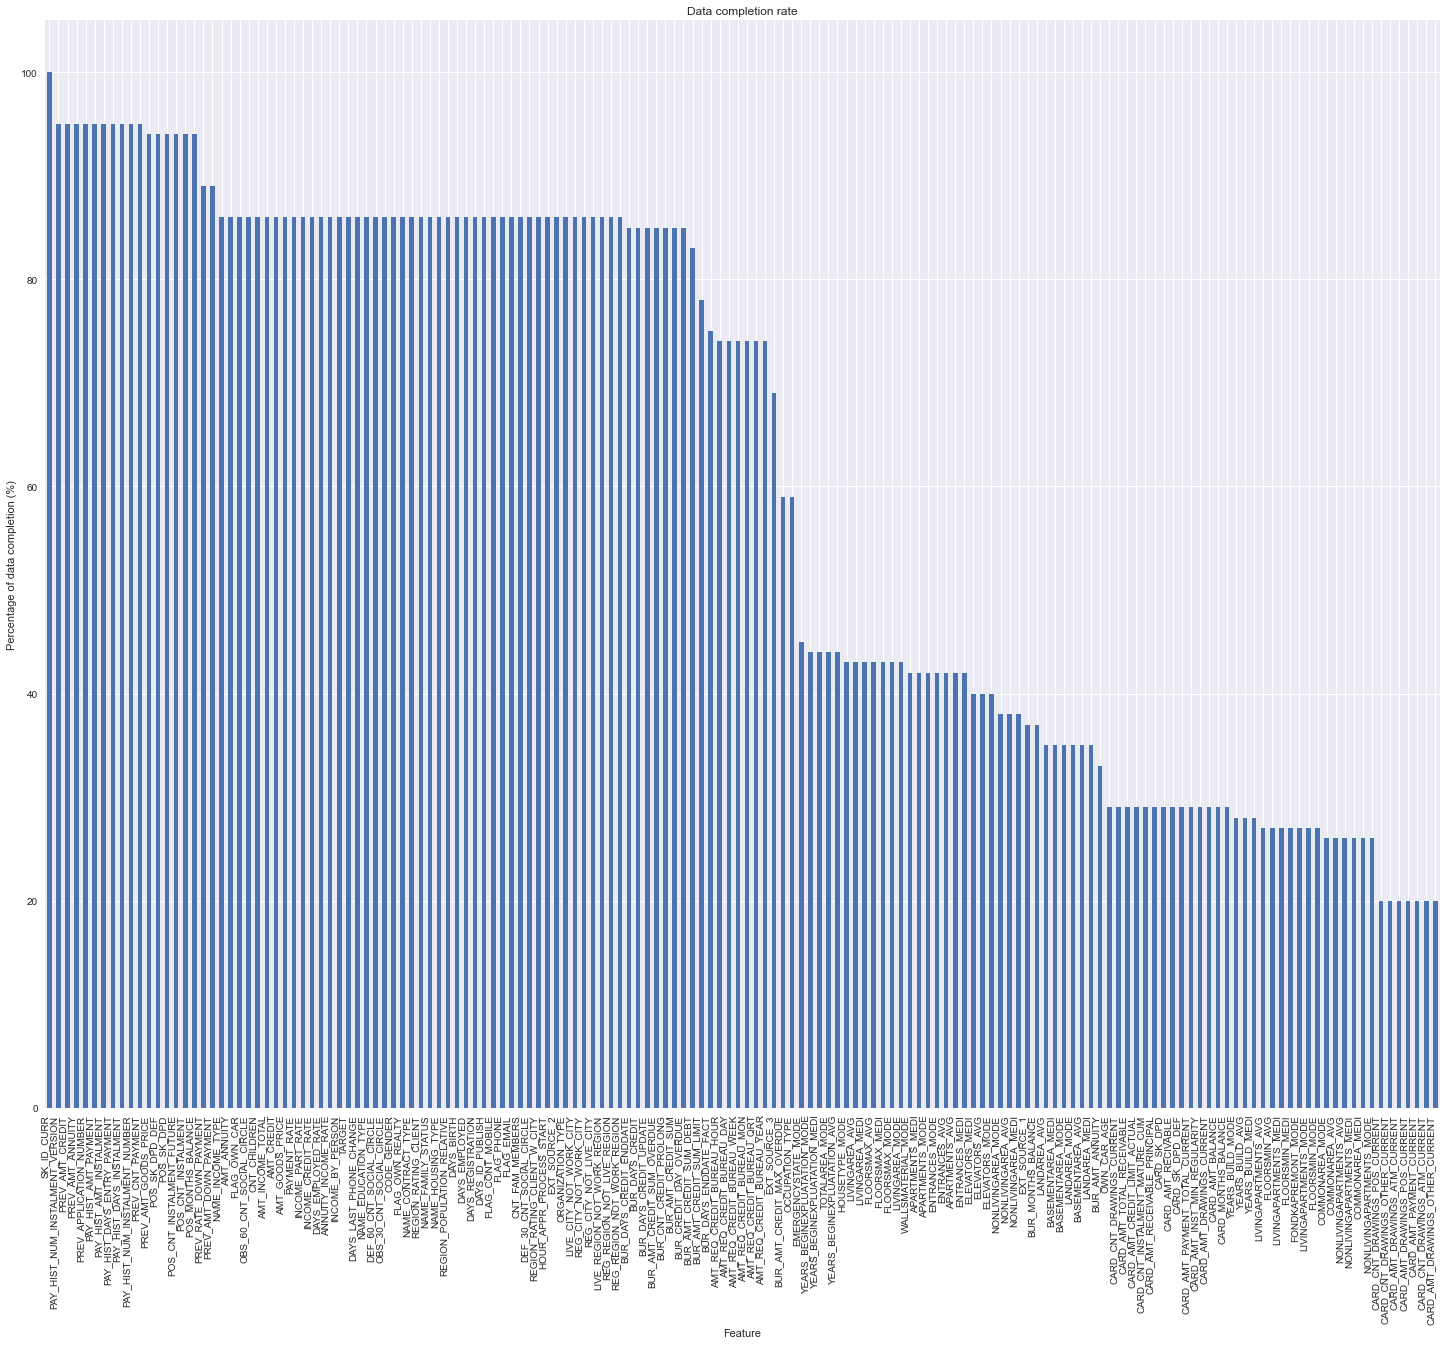

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,POS_CNT_INSTALMENT_FUTURE,POS_SK_DPD,POS_SK_DPD_DEF,PREV_APPLICATION_NUMBER,PREV_AMT_ANNUITY,PREV_AMT_DOWN_PAYMENT,PREV_AMT_CREDIT,PREV_AMT_GOODS_PRICE,PREV_RATE_DOWN_PAYMENT,PREV_CNT_PAYMENT
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.000,406597.5,24700.5,...,15.000000,0.000000,0.000000,1.0,9251.775000,0.000000,179055.000000,1.790550e+05,0.000000,24.000000
1,100003,0.0,Cash loans,F,N,N,0.0,270000.000,1293502.5,35698.5,...,5.785714,0.000000,0.000000,3.0,56553.990000,3442.500000,484191.000000,4.354365e+05,0.050030,10.000000
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.000,135000.0,6750.0,...,2.250000,0.000000,0.000000,1.0,5357.250000,4860.000000,20106.000000,2.428200e+04,0.212008,4.000000
3,100006,0.0,Cash loans,F,N,Y,0.0,135000.000,312682.5,29686.5,...,8.650000,0.000000,0.000000,9.0,23651.175000,34840.170000,291695.500000,4.083049e+05,0.163412,23.000000
4,100007,0.0,Cash loans,M,N,Y,0.0,121500.000,513000.0,21865.5,...,8.969697,0.000000,0.000000,6.0,12278.805000,3390.750000,166638.750000,1.505302e+05,0.159516,20.666667
5,100008,0.0,Cash loans,M,N,Y,0.0,99000.000,490495.5,27517.5,...,4.108434,339.060241,0.000000,5.0,15839.696250,5548.500000,162767.700000,1.946272e+05,0.073051,14.000000
6,100009,0.0,Cash loans,F,Y,Y,1.0,171000.000,1560726.0,41301.0,...,3.781250,0.000000,0.000000,7.0,10051.412143,9203.142857,70137.642857,7.674171e+04,0.126602,8.000000
7,100010,0.0,Cash loans,M,Y,Y,0.0,360000.000,1530000.0,42075.0,...,5.000000,0.000000,0.000000,1.0,27463.410000,0.000000,260811.000000,2.472120e+05,0.000000,10.000000
8,100011,0.0,Cash loans,F,N,Y,0.0,112500.000,1019610.0,33826.5,...,7.000000,205.666667,0.346667,4.0,18303.195000,6797.250000,261840.375000,2.703105e+05,0.050005,14.000000
9,100012,0.0,Revolving loans,M,N,Y,0.0,135000.000,405000.0,20250.0,...,10.217391,0.000000,0.000000,4.0,7894.155000,0.000000,74119.500000,8.124000e+04,0.000000,18.000000


In [32]:
# Displaying the dataset completion rate
display_data_completion_rate(data, (25, 20), False)
data.head(50)

In [33]:
len(list(np.unique(data.SK_ID_CURR)))

356095

## 1.3 Nettoyage du jeu de données final

### 1.3.1 Gestion des valeurs manquantes

In [34]:
# 1.3 Cleaning the final dataset
# 1.3.1 Management of missing values
data = data.dropna(subset=['TARGET'])
data.reset_index(inplace=True, drop=True)
data.shape

(307511, 154)

In [35]:
# Management of features according to the data completion rate
# Remove features with completion rate below 80%
completion_df = data.count() / len(data) * 100
completion_df = completion_df[completion_df < 80]
features_list = list(completion_df.index)
data = data.drop(features_list, axis=1)
print(data.shape)
print(len(features_list))
features_list

(307511, 79)
75


['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

### 1.3.2 Gestion des variables

#### 1.3.2.1 La conversion des variables catégorielles booléennes

In [36]:
# 1.3.2 Management of features
# 1.3.2.1 The conversion of Boolean categorical features
df = data.select_dtypes('object').nunique()
binary_categ_features = list(df[df == 2].index)
print(len(binary_categ_features))
binary_categ_features

3


['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [37]:
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].replace(
                                            {'N': 0, 'Y': 1})
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace(
                                            {'N': 0, 'Y': 1})
data['NAME_CONTRACT_TYPE'] = data['NAME_CONTRACT_TYPE'].replace(
                            {'Cash loans': 1, 'Revolving loans': 0})
print(data.shape)
data.head(50)

(307511, 79)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,POS_CNT_INSTALMENT_FUTURE,POS_SK_DPD,POS_SK_DPD_DEF,PREV_APPLICATION_NUMBER,PREV_AMT_ANNUITY,PREV_AMT_DOWN_PAYMENT,PREV_AMT_CREDIT,PREV_AMT_GOODS_PRICE,PREV_RATE_DOWN_PAYMENT,PREV_CNT_PAYMENT
0,100002,1.0,1,M,0,1,0.0,202500.000,406597.5,24700.5,...,15.000000,0.000000,0.000000,1.0,9251.775000,0.000000,179055.000000,1.790550e+05,0.000000,24.000000
1,100003,0.0,1,F,0,0,0.0,270000.000,1293502.5,35698.5,...,5.785714,0.000000,0.000000,3.0,56553.990000,3442.500000,484191.000000,4.354365e+05,0.050030,10.000000
2,100004,0.0,0,M,1,1,0.0,67500.000,135000.0,6750.0,...,2.250000,0.000000,0.000000,1.0,5357.250000,4860.000000,20106.000000,2.428200e+04,0.212008,4.000000
3,100006,0.0,1,F,0,1,0.0,135000.000,312682.5,29686.5,...,8.650000,0.000000,0.000000,9.0,23651.175000,34840.170000,291695.500000,4.083049e+05,0.163412,23.000000
4,100007,0.0,1,M,0,1,0.0,121500.000,513000.0,21865.5,...,8.969697,0.000000,0.000000,6.0,12278.805000,3390.750000,166638.750000,1.505302e+05,0.159516,20.666667
5,100008,0.0,1,M,0,1,0.0,99000.000,490495.5,27517.5,...,4.108434,339.060241,0.000000,5.0,15839.696250,5548.500000,162767.700000,1.946272e+05,0.073051,14.000000
6,100009,0.0,1,F,1,1,1.0,171000.000,1560726.0,41301.0,...,3.781250,0.000000,0.000000,7.0,10051.412143,9203.142857,70137.642857,7.674171e+04,0.126602,8.000000
7,100010,0.0,1,M,1,1,0.0,360000.000,1530000.0,42075.0,...,5.000000,0.000000,0.000000,1.0,27463.410000,0.000000,260811.000000,2.472120e+05,0.000000,10.000000
8,100011,0.0,1,F,0,1,0.0,112500.000,1019610.0,33826.5,...,7.000000,205.666667,0.346667,4.0,18303.195000,6797.250000,261840.375000,2.703105e+05,0.050005,14.000000
9,100012,0.0,0,M,0,1,0.0,135000.000,405000.0,20250.0,...,10.217391,0.000000,0.000000,4.0,7894.155000,0.000000,74119.500000,8.124000e+04,0.000000,18.000000


#### 1.3.2.2 Les variables numériques et binaires

In [38]:
# 1.3.2.2 Numerical and binary features
numerical_features = list(data.select_dtypes('int64').nunique().index)
numerical_features.extend(list(data.select_dtypes('float64').nunique().index))
numerical_features.remove('SK_ID_CURR')
print(len(numerical_features))
numerical_features

72


['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'INCOME_BY_PERSON',
 'ANNUITY_INCOME_RATE

#### 1.3.2.3 Les variables binaires

In [39]:
# 1.3.2.3 Binary features
df = data[numerical_features].nunique()
binary_num_features = list(df[df == 2].index)
for feature in binary_num_features:
    data[feature] = data[feature].astype('int64')
print(len(binary_num_features))
binary_num_features

13


['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'TARGET',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

#### 1.3.2.4 Les variables numériques

In [40]:
# 1.3.2.4 Numerical features
df = data[numerical_features].nunique()
num_features = list(df[df != 2].index)
print(len(num_features))
num_features

59


['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'INCOME_BY_PERSON',
 'ANNUITY_INCOME_RATE',
 'DAYS_EMPLOYED_RATE',
 'INCOME_CREDIT_RATE',
 'INCOME_PART_RATE',
 'PAYMENT_RATE',
 'BUR_DAYS_CREDIT',
 'BUR_CREDIT_DAY_OVERDUE',
 'BUR_DAYS_CREDIT_ENDDATE',
 'BUR_CNT_CREDIT_PROLONG',
 'BUR_AMT_CREDIT_SUM',
 'BUR_AMT_CREDIT_SUM_DEBT',
 'BUR_AMT_CREDIT_SUM_OVERDUE',
 'BUR_DAYS_CREDIT_UPDATE',


#### 1.3.2.5 Les variables catégorielles

In [41]:
# 1.3.2.5 Categorical features
categorical_features = list(data.select_dtypes('object').nunique().index)
print(len(categorical_features))
categorical_features

6


['CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE']

### 1.3.3 Gestion des doublons

In [42]:
# 1.3.3 Management of duplicate data
data[data.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,POS_CNT_INSTALMENT_FUTURE,POS_SK_DPD,POS_SK_DPD_DEF,PREV_APPLICATION_NUMBER,PREV_AMT_ANNUITY,PREV_AMT_DOWN_PAYMENT,PREV_AMT_CREDIT,PREV_AMT_GOODS_PRICE,PREV_RATE_DOWN_PAYMENT,PREV_CNT_PAYMENT


### 1.3.4 Gestion des outliers

In [43]:
# 1.3.4 Management of outliers
# Maximum values
data[num_features].max()

CNT_CHILDREN                       1.900000e+01
AMT_INCOME_TOTAL                   1.170000e+08
AMT_CREDIT                         4.050000e+06
AMT_ANNUITY                        2.580255e+05
AMT_GOODS_PRICE                    4.050000e+06
REGION_POPULATION_RELATIVE         7.250800e-02
DAYS_BIRTH                        -7.489000e+03
DAYS_EMPLOYED                      3.652430e+05
DAYS_REGISTRATION                  0.000000e+00
DAYS_ID_PUBLISH                    0.000000e+00
CNT_FAM_MEMBERS                    2.000000e+01
REGION_RATING_CLIENT               3.000000e+00
REGION_RATING_CLIENT_W_CITY        3.000000e+00
HOUR_APPR_PROCESS_START            2.300000e+01
EXT_SOURCE_2                       8.549997e-01
EXT_SOURCE_3                       8.960095e-01
OBS_30_CNT_SOCIAL_CIRCLE           3.480000e+02
DEF_30_CNT_SOCIAL_CIRCLE           3.400000e+01
OBS_60_CNT_SOCIAL_CIRCLE           3.440000e+02
DEF_60_CNT_SOCIAL_CIRCLE           2.400000e+01
DAYS_LAST_PHONE_CHANGE             0.000

In [44]:
# Minimum values
data[num_features].min()

CNT_CHILDREN                       0.000000e+00
AMT_INCOME_TOTAL                   2.565000e+04
AMT_CREDIT                         4.500000e+04
AMT_ANNUITY                        1.615500e+03
AMT_GOODS_PRICE                    4.050000e+04
REGION_POPULATION_RELATIVE         2.900000e-04
DAYS_BIRTH                        -2.522900e+04
DAYS_EMPLOYED                     -1.791200e+04
DAYS_REGISTRATION                 -2.467200e+04
DAYS_ID_PUBLISH                   -7.197000e+03
CNT_FAM_MEMBERS                    1.000000e+00
REGION_RATING_CLIENT               1.000000e+00
REGION_RATING_CLIENT_W_CITY        1.000000e+00
HOUR_APPR_PROCESS_START            0.000000e+00
EXT_SOURCE_2                       8.173617e-08
EXT_SOURCE_3                       5.272652e-04
OBS_30_CNT_SOCIAL_CIRCLE           0.000000e+00
DEF_30_CNT_SOCIAL_CIRCLE           0.000000e+00
OBS_60_CNT_SOCIAL_CIRCLE           0.000000e+00
DEF_60_CNT_SOCIAL_CIRCLE           0.000000e+00
DAYS_LAST_PHONE_CHANGE            -4.292

In [45]:
# Cleaning outliers of the feature "DAYS_EMPLOYED"
index_list = list(data.index[(data.DAYS_EMPLOYED >= 36500)])
data.drop(index_list, inplace=True)
data.reset_index(inplace=True, drop=True)
data.shape

(252137, 79)

In [46]:
# Displaying the dataset information
display_dataset_info(data)

Dimensions of the dataset: (252137, 79)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252137 entries, 0 to 252136
Data columns (total 79 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   SK_ID_CURR                       252137 non-null  int64  
 1   TARGET                           252137 non-null  int64  
 2   NAME_CONTRACT_TYPE               252137 non-null  int64  
 3   CODE_GENDER                      252137 non-null  object 
 4   FLAG_OWN_CAR                     252137 non-null  int64  
 5   FLAG_OWN_REALTY                  252137 non-null  int64  
 6   CNT_CHILDREN                     252137 non-null  float64
 7   AMT_INCOME_TOTAL                 252137 non-null  float64
 8   AMT_CREDIT                       252137 non-null  float64
 9   AMT_ANNUITY                      252125 non-null  float64
 10  AMT_GOODS_PRICE                  251881 non-null  float

SK_ID_CURR                100.00
TARGET                    100.00
NAME_CONTRACT_TYPE        100.00
CODE_GENDER               100.00
FLAG_OWN_CAR              100.00
                           ...  
PREV_AMT_DOWN_PAYMENT      88.96
PREV_AMT_CREDIT            94.58
PREV_AMT_GOODS_PRICE       94.27
PREV_RATE_DOWN_PAYMENT     88.96
PREV_CNT_PAYMENT           94.44
Length: 79, dtype: float64


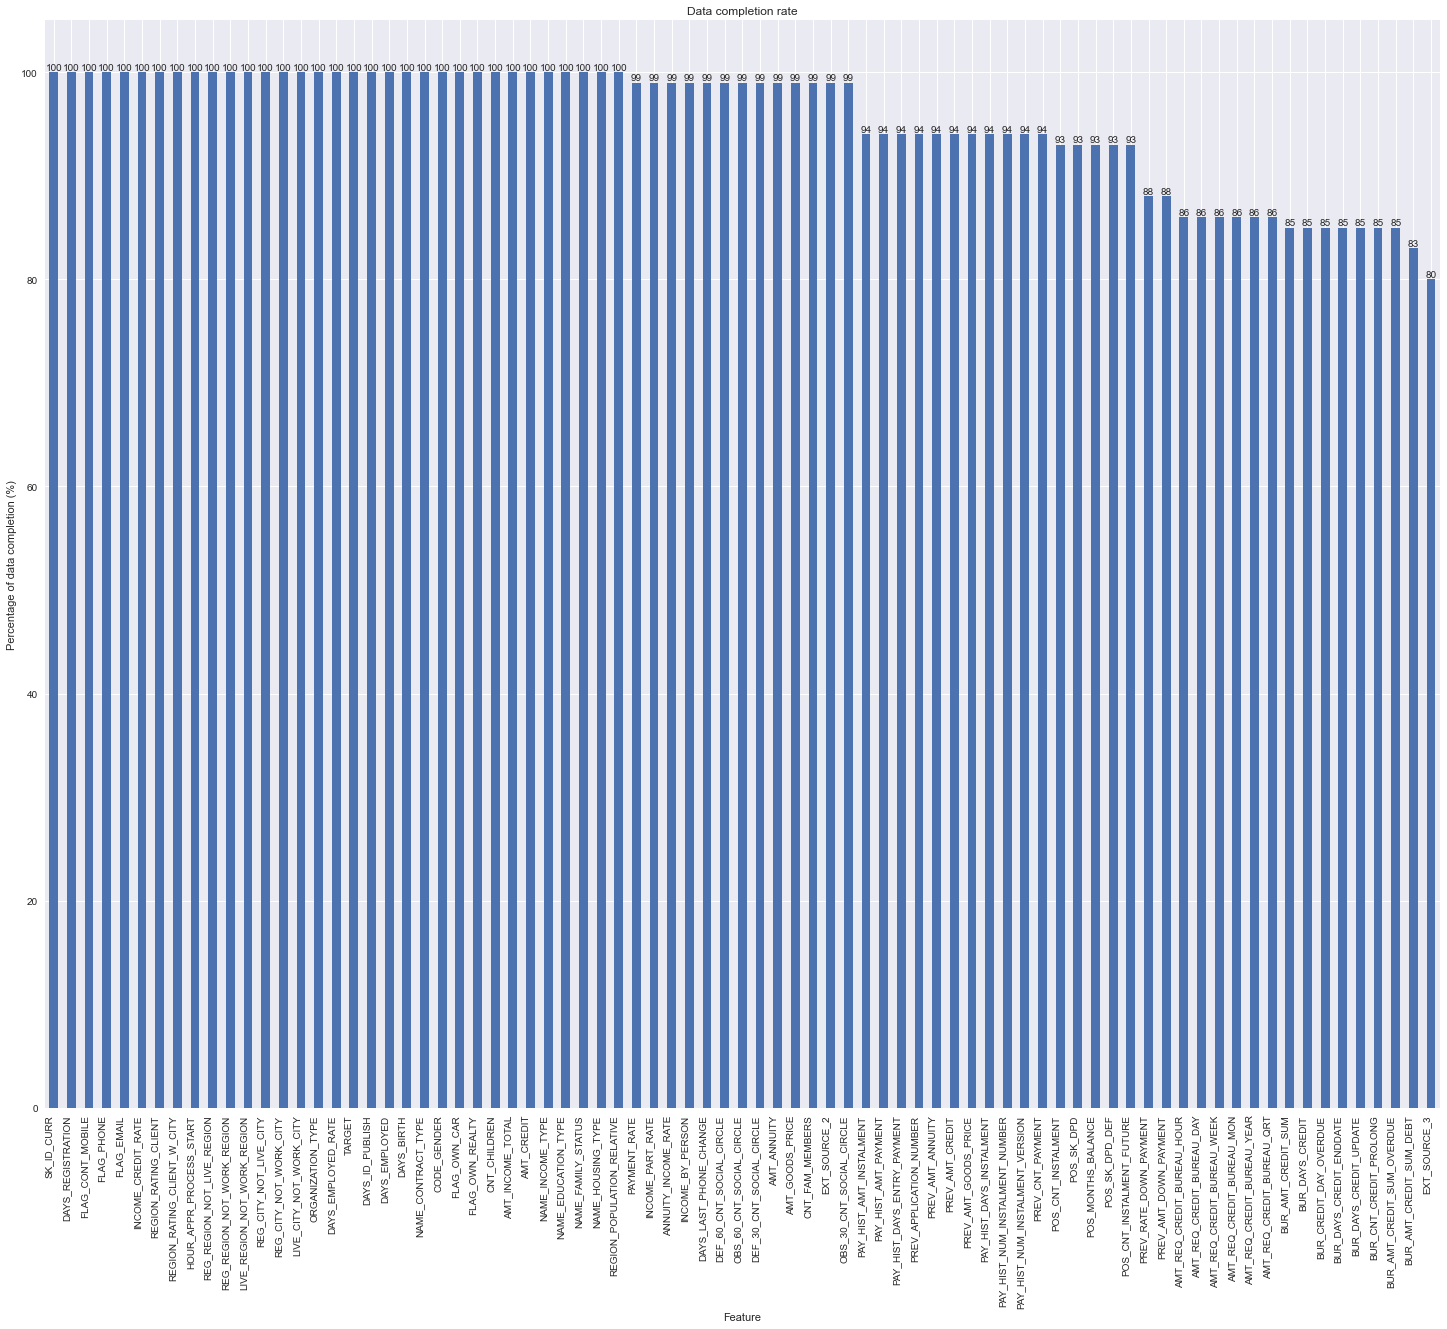

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,POS_CNT_INSTALMENT_FUTURE,POS_SK_DPD,POS_SK_DPD_DEF,PREV_APPLICATION_NUMBER,PREV_AMT_ANNUITY,PREV_AMT_DOWN_PAYMENT,PREV_AMT_CREDIT,PREV_AMT_GOODS_PRICE,PREV_RATE_DOWN_PAYMENT,PREV_CNT_PAYMENT
0,100002,1,1,M,0,1,0.0,202500.0,406597.5,24700.5,...,15.000000,0.000000,0.000000,1.0,9251.775000,0.000000,179055.000000,1.790550e+05,0.000000,24.000000
1,100003,0,1,F,0,0,0.0,270000.0,1293502.5,35698.5,...,5.785714,0.000000,0.000000,3.0,56553.990000,3442.500000,484191.000000,4.354365e+05,0.050030,10.000000
2,100004,0,0,M,1,1,0.0,67500.0,135000.0,6750.0,...,2.250000,0.000000,0.000000,1.0,5357.250000,4860.000000,20106.000000,2.428200e+04,0.212008,4.000000
3,100006,0,1,F,0,1,0.0,135000.0,312682.5,29686.5,...,8.650000,0.000000,0.000000,9.0,23651.175000,34840.170000,291695.500000,4.083049e+05,0.163412,23.000000
4,100007,0,1,M,0,1,0.0,121500.0,513000.0,21865.5,...,8.969697,0.000000,0.000000,6.0,12278.805000,3390.750000,166638.750000,1.505302e+05,0.159516,20.666667
5,100008,0,1,M,0,1,0.0,99000.0,490495.5,27517.5,...,4.108434,339.060241,0.000000,5.0,15839.696250,5548.500000,162767.700000,1.946272e+05,0.073051,14.000000
6,100009,0,1,F,1,1,1.0,171000.0,1560726.0,41301.0,...,3.781250,0.000000,0.000000,7.0,10051.412143,9203.142857,70137.642857,7.674171e+04,0.126602,8.000000
7,100010,0,1,M,1,1,0.0,360000.0,1530000.0,42075.0,...,5.000000,0.000000,0.000000,1.0,27463.410000,0.000000,260811.000000,2.472120e+05,0.000000,10.000000
8,100012,0,0,M,0,1,0.0,135000.0,405000.0,20250.0,...,10.217391,0.000000,0.000000,4.0,7894.155000,0.000000,74119.500000,8.124000e+04,0.000000,18.000000
9,100014,0,1,F,0,1,1.0,112500.0,652500.0,21177.0,...,5.812500,0.000000,0.000000,2.0,12806.550000,0.000000,102834.000000,9.653625e+04,0.000000,9.000000


In [47]:
# Displaying the dataset completion rate
display_data_completion_rate(data, (25, 20), True)
data.head(50)

# 2. Analyse exploratoire

## 2.1 Analyse des corrélations

Nous analysons les corrélations entre les variables quantitatives afin de ne pas prendre en compte les variables fortement corrélées(coefficient de corrélation supérieur à 0,8) pour la sélection des variables pertinentes.

In [48]:
# 2. Exploratory analysis
# 2.1 Correlation analysis
corr = data[numerical_features]
corr = corr.corr()
numeric_features = []
corr_features = []

for feature in numerical_features:
    if feature not in corr_features:
        corr_df = corr[corr[feature].abs() > 0.8]
        corr_features.extend(list(corr_df[corr_df == True].index))
        corr_features.remove(feature)
        numeric_features.append(feature)
print(len(corr_features))
corr_features

16


['CNT_FAM_MEMBERS',
 'INCOME_BY_PERSON',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED_RATE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'PAY_HIST_DAYS_ENTRY_PAYMENT',
 'POS_MONTHS_BALANCE',
 'PAY_HIST_AMT_PAYMENT',
 'POS_CNT_INSTALMENT_FUTURE',
 'PREV_AMT_GOODS_PRICE',
 'PREV_AMT_GOODS_PRICE']

In [49]:
# Numerical features
print(len(numeric_features))
numeric_features

58


['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'ANNUITY_INCOME_RATE',
 'INCOME_CREDIT_RATE',
 'INCOME_PART_RATE',
 'PAYMENT_RATE',
 'BUR_DAYS_CREDIT',
 'BUR_CREDIT_DAY_OVERDUE',
 'BUR_DAYS_CREDIT_ENDDATE',
 'BUR_CNT_CREDIT_PROLONG',
 'BUR_AMT_CREDIT_SUM',
 'BUR_AMT_CREDIT_SUM_D

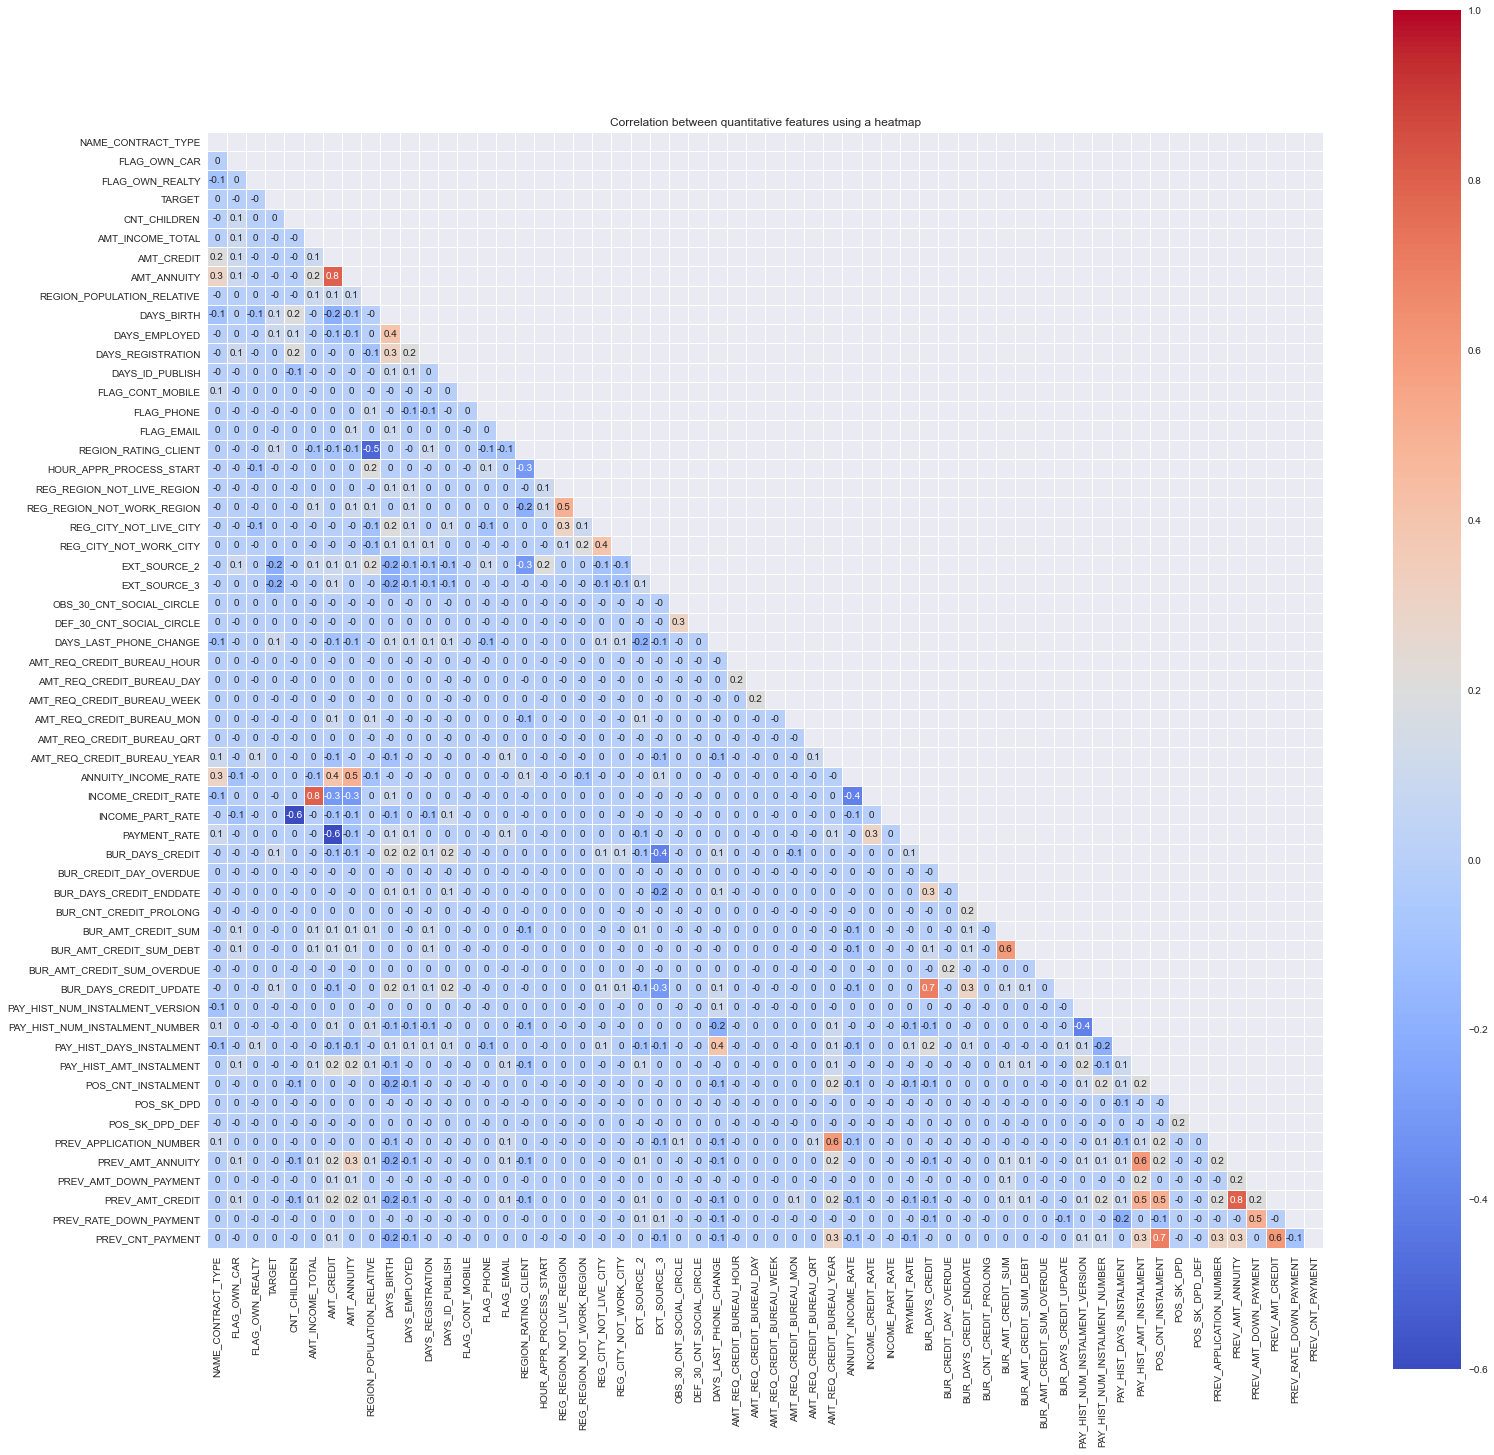

In [50]:
# Displaying correlation heatmap
corr = data[numeric_features]
corr = corr.corr()
corr = round(corr, 1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

# Setup the matplotlib figure
fig = plt.subplots(figsize=(25, 25))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap='coolwarm',
    mask=mask,
    vmax=1,
    square=True,
    linewidths=.5,
    cbar=True,
    annot=True)
plt.title('Correlation between quantitative features using a heatmap')
plt.show()

In [51]:
# Selection of relevant features after correlation analysis
features = ['SK_ID_CURR']
features.extend(numeric_features)
features.extend(categorical_features)
customers_df = data[features]

# Displaying the dataset information
display_dataset_info(customers_df)

Dimensions of the dataset: (252137, 65)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252137 entries, 0 to 252136
Data columns (total 65 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   SK_ID_CURR                       252137 non-null  int64  
 1   NAME_CONTRACT_TYPE               252137 non-null  int64  
 2   FLAG_OWN_CAR                     252137 non-null  int64  
 3   FLAG_OWN_REALTY                  252137 non-null  int64  
 4   TARGET                           252137 non-null  int64  
 5   CNT_CHILDREN                     252137 non-null  float64
 6   AMT_INCOME_TOTAL                 252137 non-null  float64
 7   AMT_CREDIT                       252137 non-null  float64
 8   AMT_ANNUITY                      252125 non-null  float64
 9   REGION_POPULATION_RELATIVE       252137 non-null  float64
 10  DAYS_BIRTH                       252137 non-null  float

SK_ID_CURR             100.0
NAME_CONTRACT_TYPE     100.0
FLAG_OWN_CAR           100.0
FLAG_OWN_REALTY        100.0
TARGET                 100.0
                       ...  
NAME_INCOME_TYPE       100.0
NAME_EDUCATION_TYPE    100.0
NAME_FAMILY_STATUS     100.0
NAME_HOUSING_TYPE      100.0
ORGANIZATION_TYPE      100.0
Length: 65, dtype: float64


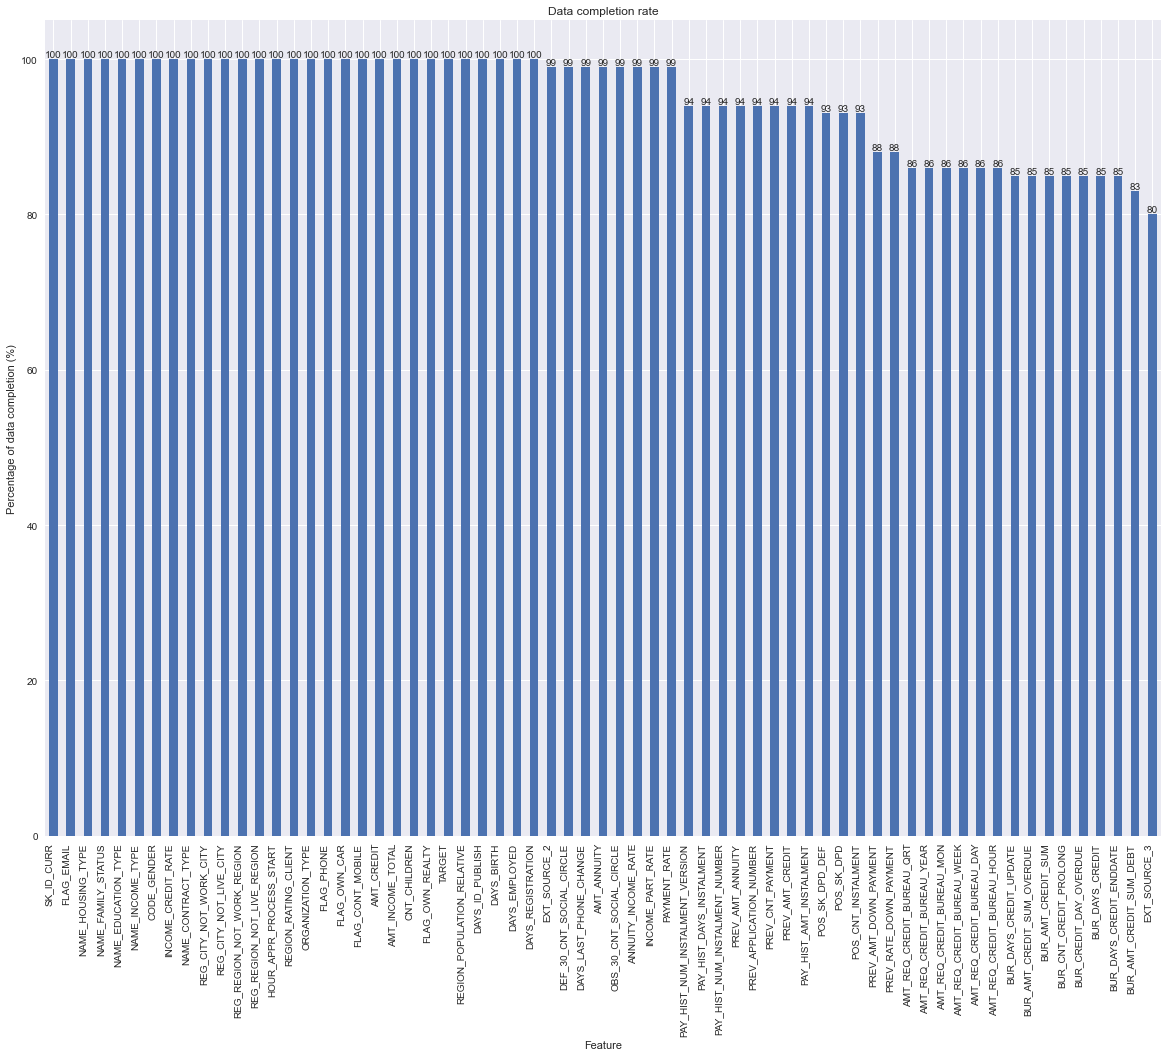

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,...,PREV_AMT_DOWN_PAYMENT,PREV_AMT_CREDIT,PREV_RATE_DOWN_PAYMENT,PREV_CNT_PAYMENT,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,100002,1,0,1,1,0.0,202500.0,406597.5,24700.5,0.018801,...,0.000000,179055.000000,0.000000,24.000000,M,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3
1,100003,1,0,0,0,0.0,270000.0,1293502.5,35698.5,0.003541,...,3442.500000,484191.000000,0.050030,10.000000,F,State servant,Higher education,Married,House / apartment,School
2,100004,0,1,1,0,0.0,67500.0,135000.0,6750.0,0.010032,...,4860.000000,20106.000000,0.212008,4.000000,M,Working,Secondary / secondary special,Single / not married,House / apartment,Government
3,100006,1,0,1,0,0.0,135000.0,312682.5,29686.5,0.008019,...,34840.170000,291695.500000,0.163412,23.000000,F,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3
4,100007,1,0,1,0,0.0,121500.0,513000.0,21865.5,0.028663,...,3390.750000,166638.750000,0.159516,20.666667,M,Working,Secondary / secondary special,Single / not married,House / apartment,Religion
5,100008,1,0,1,0,0.0,99000.0,490495.5,27517.5,0.035792,...,5548.500000,162767.700000,0.073051,14.000000,M,State servant,Secondary / secondary special,Married,House / apartment,Other
6,100009,1,1,1,0,1.0,171000.0,1560726.0,41301.0,0.035792,...,9203.142857,70137.642857,0.126602,8.000000,F,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3
7,100010,1,1,1,0,0.0,360000.0,1530000.0,42075.0,0.003122,...,0.000000,260811.000000,0.000000,10.000000,M,State servant,Higher education,Married,House / apartment,Other
8,100012,0,0,1,0,0.0,135000.0,405000.0,20250.0,0.019689,...,0.000000,74119.500000,0.000000,18.000000,M,Working,Secondary / secondary special,Single / not married,House / apartment,Electricity
9,100014,1,0,1,0,1.0,112500.0,652500.0,21177.0,0.022800,...,0.000000,102834.000000,0.000000,9.000000,F,Working,Higher education,Married,House / apartment,Medicine


In [52]:
# Displaying the dataset completion rate
display_data_completion_rate(customers_df, (20, 15), True)
customers_df.head(50)

## 2.2 Exploration du jeu de données

### 2.2.1 Classification binaire sur des données déséquilibrées

In [53]:
# 2.2 Exploration of the dataset
# 2.2.1 Binary classification on imbalanced dataset
def display_countplot(data, x_var, y_var, figsize):
    """This function displays a countplot."""
    # Setup the figure
    fig = plt.figure(figsize=figsize)
    ax = sns.countplot(x=x_var, y=y_var, data=data)
    
    if x_var is not None:
        feature = x_var
        for value in ax.patches:
            rate_format = 100 * value.get_height() / len(data[feature])
            percentage = '{:.1f}%'.format(rate_format)
            x = value.get_x() + value.get_width() / 2
            y = value.get_height()
            ax.annotate(percentage,(x, y), fontsize=12, fontweight='bold')
        plt.xlabel('{}'.format(feature))
    else:
        feature = y_var
        for value in ax.patches:
            rate_format = 100 * value.get_width() / len(data[feature])
            percentage = '{:.2f}%'.format(rate_format)
            x = value.get_x() + value.get_width()
            y = value.get_y() + value.get_height() / 2
            ax.annotate(percentage, (x, y), fontsize=10, fontweight='bold')
        plt.ylabel('{}'.format(feature))
    plt.show()

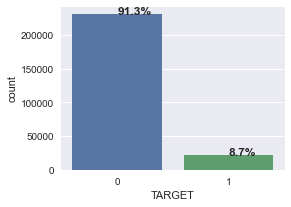

In [54]:
# Displaying the feature 'TARGET'
display_countplot(customers_df, 'TARGET', None, (4, 3))

Nous remarquons que la variable cible est de type binaire avec un fort déséquilibre entre les deux classes :
- Classe 0 : 91% ;
- Classe 1 : 9%.

Il s'agit donc d'un problème de classification binaire sur des données déséquilibrées.

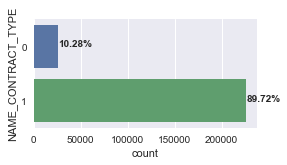

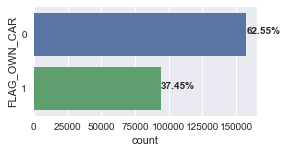

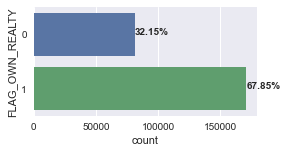

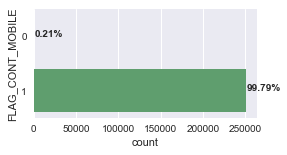

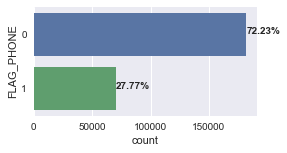

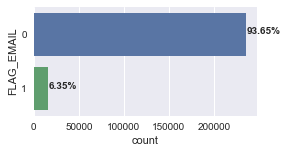

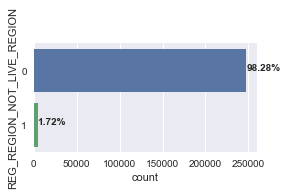

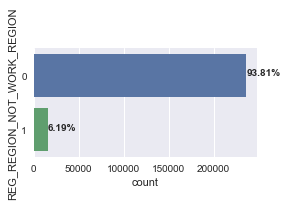

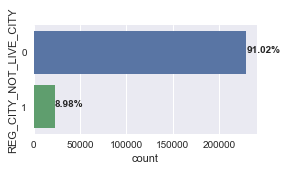

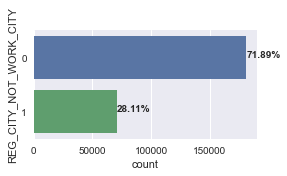

In [55]:
# Displaying other binary features
df = customers_df[numeric_features].nunique()
binary_features = list(df[df == 2].index)
binary_features.remove('TARGET')
for feature in binary_features:
    display_countplot(customers_df, None, feature, (4, 2))

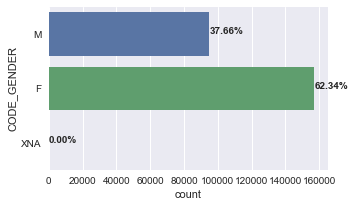

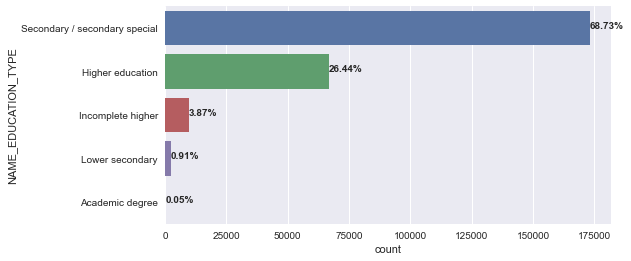

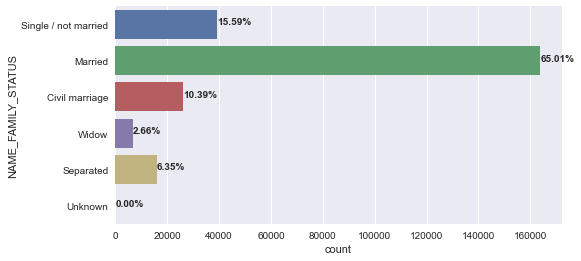

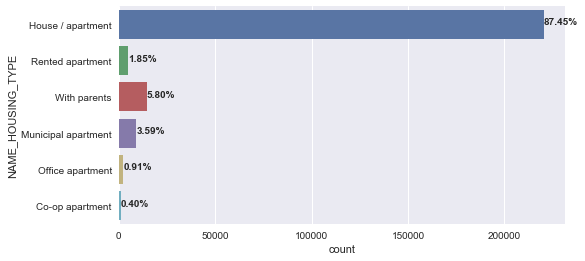

In [56]:
# Displaying categorical features
display_countplot(customers_df, None, 'CODE_GENDER', (5, 3))
display_countplot(customers_df, None, 'NAME_EDUCATION_TYPE', (8, 4))
display_countplot(customers_df, None, 'NAME_FAMILY_STATUS', (8, 4))
display_countplot(customers_df, None, 'NAME_HOUSING_TYPE', (8, 4))

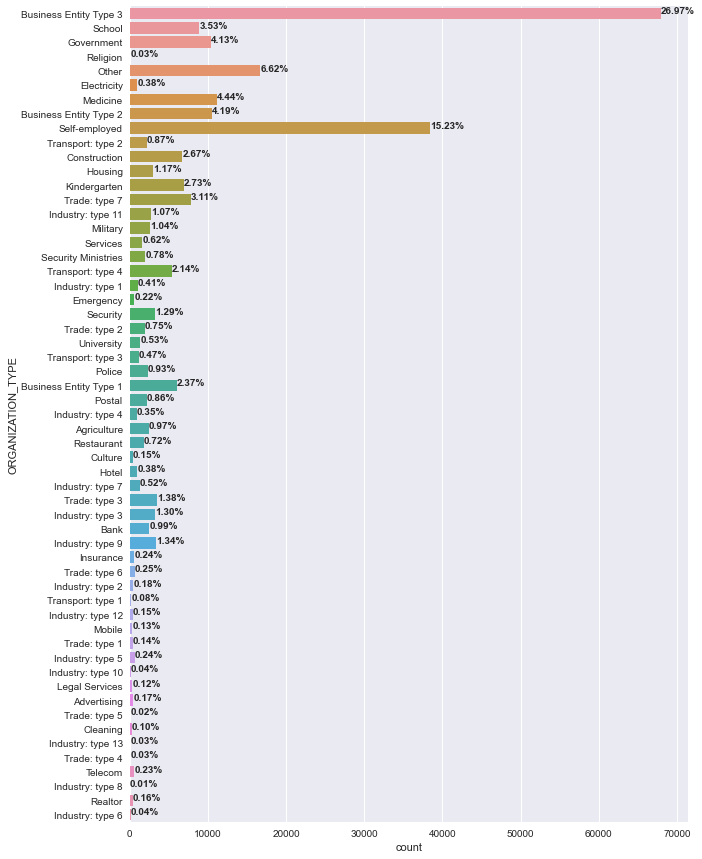

In [57]:
display_countplot(customers_df, None, 'ORGANIZATION_TYPE', (10, 15))

### 2.2.2 Distributions des variables numériques

In [58]:
# 2.2.2 Distributions of numerical features
def display_histograms(data, features):
    """This function displays histograms."""
    data = data[features]
    features_df = data[data.columns].values

    # Setup the figure
    fig = plt.figure(figsize=(20, 15))
    for value in range(features_df.shape[1]):
        ax = fig.add_subplot(4, 4, (value + 1))
        ax.hist(
            features_df[:, value],
            bins=20,
            color='steelblue',
            density=False,
            edgecolor='none')
        ax.set_title(data.columns[value], fontsize=14)
    plt.show()

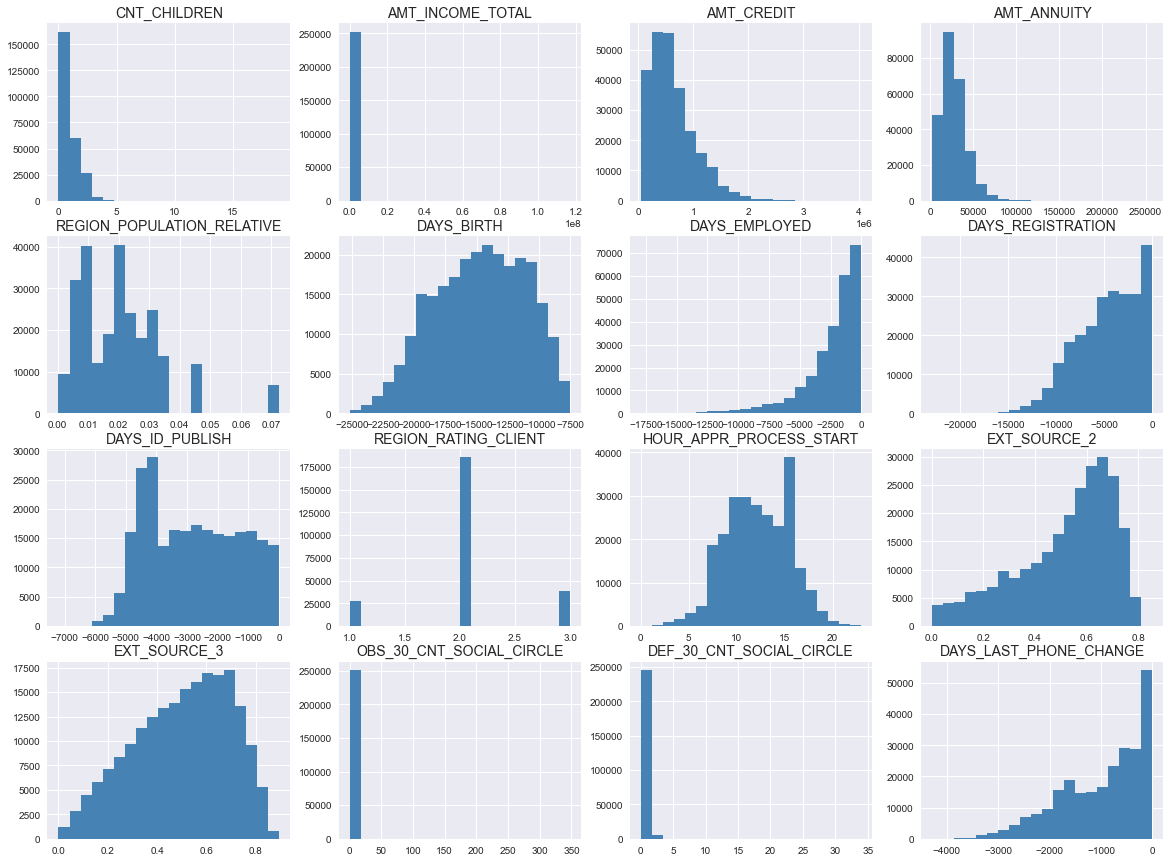

In [59]:
df = customers_df[numeric_features].nunique()
num_features = list(df[df != 2].index)
display_histograms(customers_df, num_features[0:16])

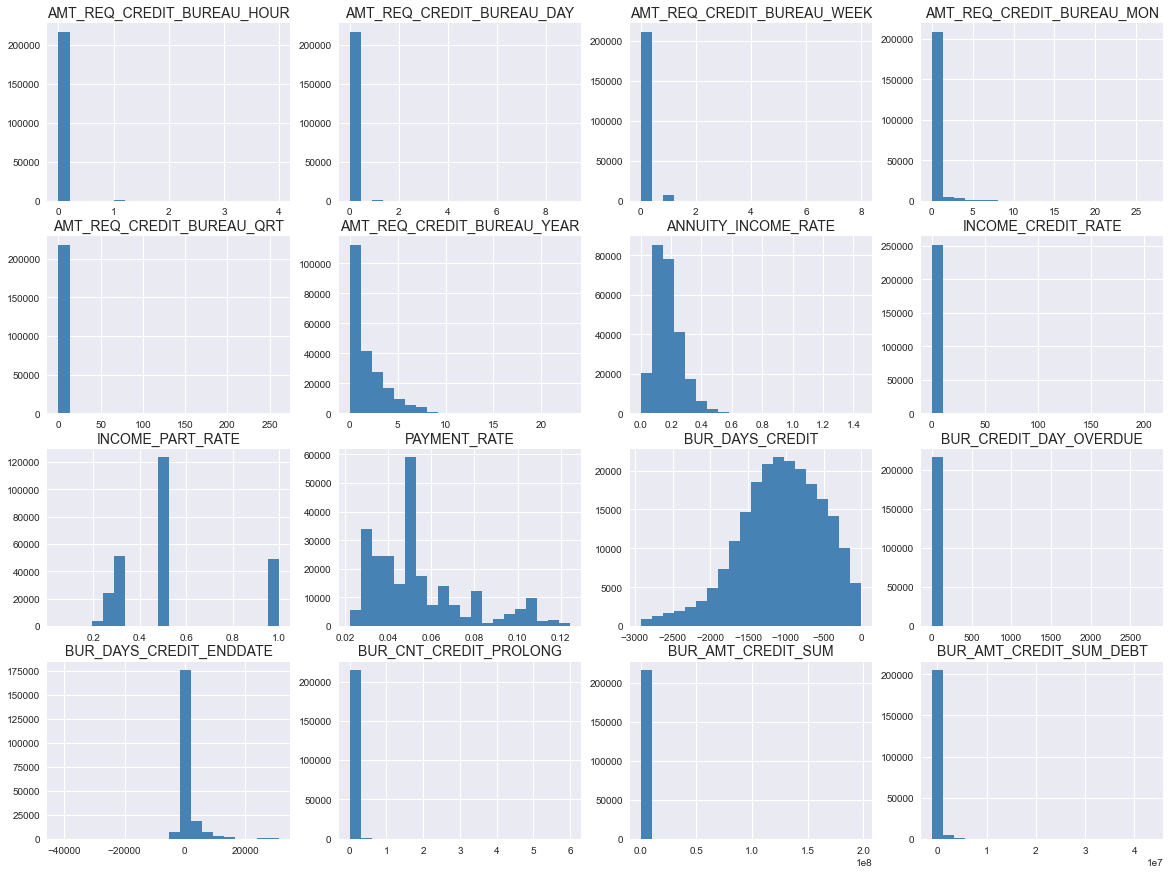

In [60]:
display_histograms(customers_df, num_features[16:32])

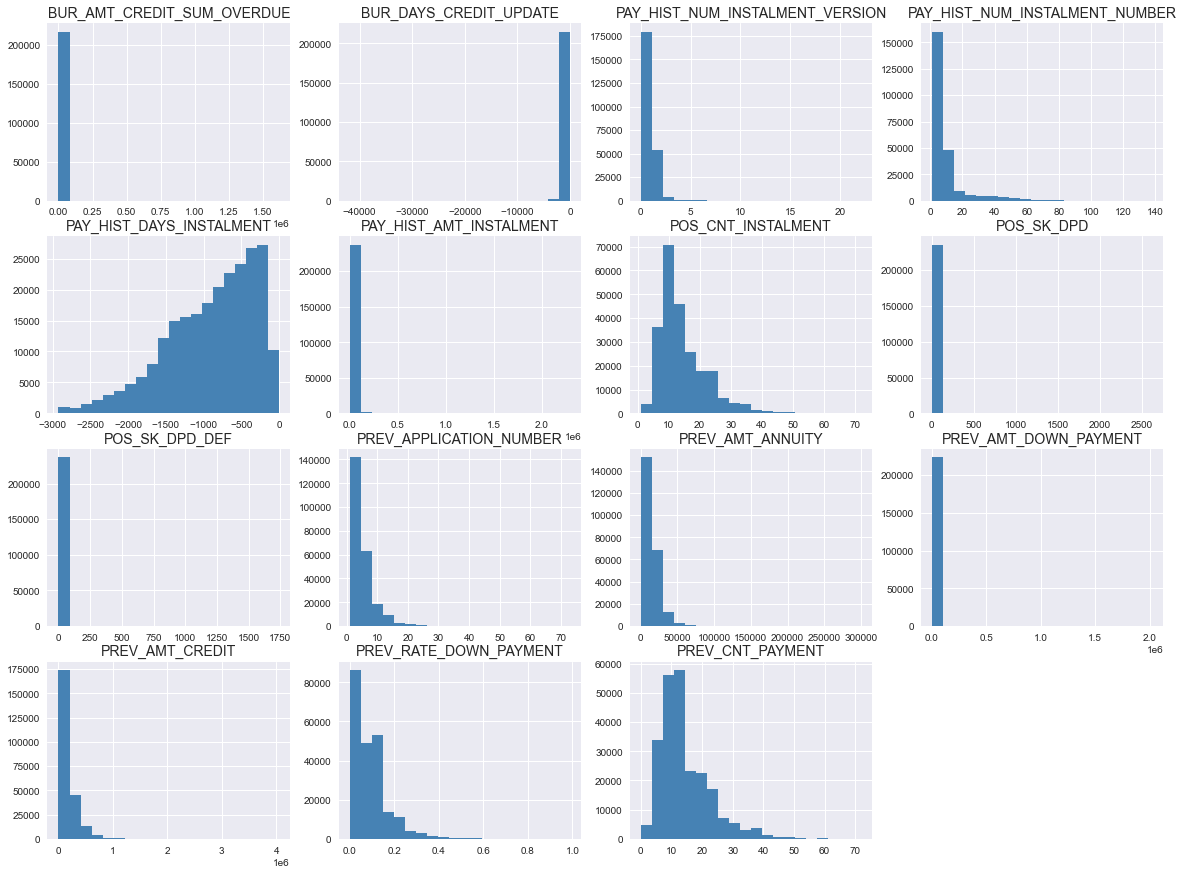

In [61]:
display_histograms(customers_df, num_features[32:len(num_features)])

Globalement, les distributions des variables ne suivent pas la distribution normale.

# 3. Export du jeu de données en format csv

In [62]:
# 3. Export of the dataset in csv format
customers_df.to_csv('customers_df.csv', index=False)